# Surprise Housing - Advanced Regression


## Problem Statement
A US-based housing company named **Surprise Housing** has decided to enter the Australian market. The company uses data analytics to purchase houses at a **price below their actual values and flip them on at a higher price**. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy to enter the market. You are required to **build a regression model using regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The Surprise Housing wants to know:**

1. Which variables are significant in predicting the price of a house
2. How well those variables describe the price of a house
3. Also, determine the optimal value of lambda for ridge and lasso regression

******************

### Business Goal 
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

******************

### Procedure:
1. Step 1: Reading and Understanding the Data (EDA)
2. Step 2: Visualising the Data
    - Univarent Analysis
    - Bivarent analysis
    - Multivarent Analysis
3. Step 3: Data Preparation
4. Step 4: Splitting the Data into Training and Testing Sets
5. Step 5: Building a linear model
6. Step 6: Residual Analysis of the train data
7. step 7: Applying Ridge and Lasso

In [1]:
# importing all the important
import numpy as np #Libraray used for numerical python
import pandas as pd #Libraray used for dataframe

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import matplotlib.pyplot as plt #Libraray used for plotting
import seaborn as sns #Libraray used for data visualization

# sklearn Libraray used for classification, predictive analytics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics #metrics module implements several loss, score, and utility functions to measure classification performance
import os # Python os system function allows us to run a command in the Python script
import random #contains a number of random number generation-related functions

# hide warnings
import warnings #Libraray used to ignore warnings due to version problems
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, mean_squared_error

## Reading and Understanding the Data (EDA)
a. Cleaning Data

In [2]:
surprise_house_data = pd.read_csv("/Users/amitkumar/Desktop/Personal/COURSES/UpGrad/2022_Batch/Assignment/AdvancedRegression/House-Price-Prediction/train.csv", encoding = 'utf-8')
surprise_house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# Check the dimensions
surprise_house_data.shape

(1460, 81)

### a. Cleaning Data

In [4]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100, 2)
missing_value.loc[missing_value>20].sort_values()

FireplaceQu    47.26
Fence          80.75
Alley          93.77
MiscFeature    96.30
PoolQC         99.52
dtype: float64

- As we can see that five columns have more than 45% of missing values and will drop these 5 columns

In [5]:
surprise_house_data = surprise_house_data.drop(missing_value.loc[missing_value>20].index, axis=1)
surprise_house_data.shape

(1460, 76)

In [6]:
missing_value = round((surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical       0.07
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
BsmtExposure     2.60
BsmtFinType2     2.60
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
LotFrontage     17.74
dtype: float64

- Here we can see LotFrontage having 17.74% missing value. And will get some insights 
- LotFrontage: Linear feet of street-connected to property

In [7]:
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [8]:
# To get the description of the dataset
surprise_house_data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

- We can clearly see that, we cannot impute any values in it, we will remove this variable cause it has 17% missing values

In [9]:
surprise_house_data = surprise_house_data.drop("LotFrontage", axis=1)
surprise_house_data.shape

(1460, 75)

In [10]:
missing_value = round( (surprise_house_data.isnull().sum()/surprise_house_data.shape[0])*100,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

- Here we can see that some of the variables have an exact same missing value of 5.55% 
- We will go through it and get some insights

In [11]:
missing_col = missing_value[missing_value>5].index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n")

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64 

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0

In [12]:
missing5_per = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                           & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull() 
                           & surprise_house_data[missing_col[4]].isnull()) ]
missing5_per.shape

(81, 75)

In [13]:
round(missing5_per.shape[0]/surprise_house_data.shape[0] *100, 2)

5.55

- We found that **5.5%** of the missing data from **'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'** are **from the same Row.**
- We cannot remove it because here when we use isnull(), it takes **NA as NULL**
- But as per **Metadata**, they have mentioned **NA is "No Garage"**
- We cannot remove the category. Insteed we will give diffent name for it like **NO-GA than NA**
- However, **'GarageYrBlt'** is numeric(Date- Year garage was built), so for **NA**, we can use **YearBuilt** for it

In [14]:
for col in missing_col:
    if col != "GarageYrBlt":
        surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-GA" if x!=x else x)

In [15]:
def re_NA_t_BLDyr(year, buildyear):
    if year != year:
        return buildyear
    return year

In [16]:
surprise_house_data["GarageYrBlt"] = list(map(re_NA_t_BLDyr, surprise_house_data["GarageYrBlt"], surprise_house_data["YearBuilt"]))

### Rechecking the Missing Values

In [17]:
missing_value = round(surprise_house_data.isnull().sum()/surprise_house_data.shape[0] *100 ,2)
missing_value.loc[missing_value>0].sort_values()

Electrical      0.07
MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtFinType1    2.53
BsmtExposure    2.60
BsmtFinType2    2.60
dtype: float64

- Here we can see that some of the variables have an missing value of 2.5 and above.
- We will go through it and get some insights

In [18]:
missing_col = missing_value.loc[missing_value>2].sort_values().index
for col in missing_col:
    print(f"{surprise_house_data[col].value_counts()} \n\n")

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 


TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 


No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 


Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 




In [19]:
missing_per02 = surprise_house_data[(surprise_house_data[missing_col[0]].isnull() & surprise_house_data[missing_col[1]].isnull() 
                            & surprise_house_data[missing_col[2]].isnull() & surprise_house_data[missing_col[3]].isnull()
                            & surprise_house_data[missing_col[4]].isnull()
                           )]
missing_per02.shape

(37, 75)

In [20]:
missing_per02.shape[0]/surprise_house_data.shape[0]*100

2.5342465753424657

In [21]:
missing_col

Index(['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'], dtype='object')

- Again we can see that **2.5%** of the missing data from **'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtExposure', 'BsmtFinType2'** are **from the same Row**
- But we can't remove it because here when we use isnull(), it takes **NA as null** 
- But as per **Metadata** they have mentioned **NA is "No Basement"**
- So we basically can't remove this category
- Insteed we will give diffent name for it like **NO-BA than NA**

In [22]:
for col in missing_col:
    surprise_house_data[col] = surprise_house_data[col].apply(lambda x: "NO-BA" if x!=x else x )
surprise_house_data.shape

(1460, 75)

In [23]:
missing_value = round (surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100, 2)
missing_value.loc[missing_value>0].sort_values()

Electrical    0.07
MasVnrType    0.55
MasVnrArea    0.55
dtype: float64

In [24]:
missing_col = missing_value.loc[missing_value>0].sort_values().index
missing_col

Index(['Electrical', 'MasVnrType', 'MasVnrArea'], dtype='object')

- Here we can see that these three variables have only 0.55% missing values, so we can directly remove them cause we will still be left with more data. 

In [25]:
surprise_house_data = surprise_house_data[~(surprise_house_data[missing_col[0]].isnull() | surprise_house_data[missing_col[1]].isnull() 
           | surprise_house_data[missing_col[2]].isnull() 
           )]
surprise_house_data.shape

(1451, 75)

In [26]:
missing_value = round( surprise_house_data.isnull().sum()/surprise_house_data.shape[0]*100,2)
missing_value[missing_value>0].sort_values()

Series([], dtype: float64)

In [27]:
# Removing ID columns
surprise_house_data = surprise_house_data.drop("Id", axis=1)
surprise_house_data.shape

(1451, 74)

In [28]:
round(surprise_house_data.shape[0]/1460 *100 ,2)

99.38

- No missing values, only 0.62% are removed, and seven columns are removed.

## Step 2: Visualising the Data

In [29]:
# Let's narrow down on the columns and drop all unnecessary variables
surprise_house_data.nunique().sort_values()

Street              2
Utilities           2
CentralAir          2
HalfBath            3
PavedDrive          3
LandSlope           3
BsmtHalfBath        3
ExterQual           4
MasVnrType          4
GarageFinish        4
Fireplaces          4
KitchenAbvGr        4
KitchenQual         4
BsmtFullBath        4
LandContour         4
LotShape            4
FullBath            4
BsmtQual            5
Electrical          5
YrSold              5
HeatingQC           5
LotConfig           5
GarageCars          5
MSZoning            5
ExterCond           5
BsmtExposure        5
BldgType            5
BsmtCond            5
SaleCondition       6
Heating             6
GarageQual          6
GarageCond          6
RoofStyle           6
Foundation          6
BsmtFinType1        7
BsmtFinType2        7
GarageType          7
Functional          7
Condition2          8
HouseStyle          8
BedroomAbvGr        8
PoolArea            8
RoofMatl            8
Condition1          9
SaleType            9
OverallCon

- Here we can clearly see each variable has at least **two unique values**, so there is no need to remove any more variables

#### Dividing the Data into categorical columns and numeric columns for better visulaization

In [30]:
surprise_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  YearBuilt      1451 non-null   int64  
 17  YearRemodAdd   1451 non-null   int64  
 18  RoofStyl

In [31]:
# Getting only categorical variables
categorical = surprise_house_data.select_dtypes(include=['object'])
print(categorical.columns,"\n", categorical.shape[1])

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object') 
 38


In [32]:
# Getting only numeric variables. 
numeric = surprise_house_data.select_dtypes(exclude=['object'])
print(numeric.columns, "\n",numeric.shape[1])

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 36


- We have 38 categorical variables and 36 numeric variables.

###  a. Univarent Analysis

In [33]:
# Below given function is used to plot multiple barPlots graphs.
def barplots(idx, col, figsize=(7,7)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    keys = surprise_house_data[col].value_counts().keys()
    values = surprise_house_data[col].value_counts().values
    sns.barplot(keys, values, palette="nipy_spectral")
    plt.show()

In [34]:
unique_cat = categorical.nunique().sort_values()
unique_cat

Street            2
CentralAir        2
Utilities         2
PavedDrive        3
LandSlope         3
KitchenQual       4
ExterQual         4
MasVnrType        4
LandContour       4
LotShape          4
GarageFinish      4
Electrical        5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
ExterCond         5
BldgType          5
LotConfig         5
GarageCond        6
GarageQual        6
Heating           6
SaleCondition     6
RoofStyle         6
Foundation        6
BsmtFinType2      7
Functional        7
GarageType        7
BsmtFinType1      7
HouseStyle        8
Condition2        8
RoofMatl          8
Condition1        9
SaleType          9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

<Figure size 432x288 with 0 Axes>

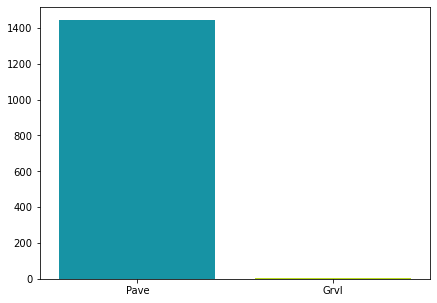

<Figure size 432x288 with 0 Axes>

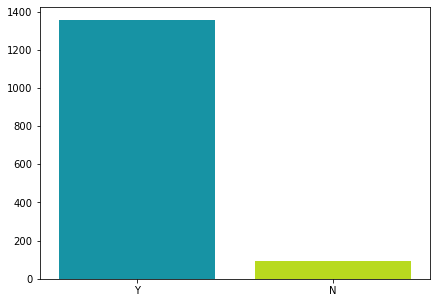

<Figure size 432x288 with 0 Axes>

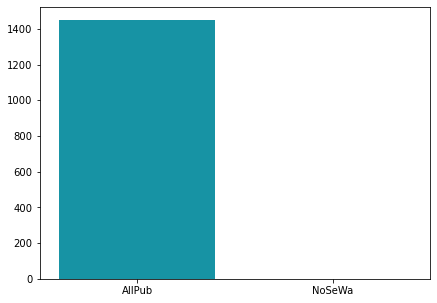

<Figure size 432x288 with 0 Axes>

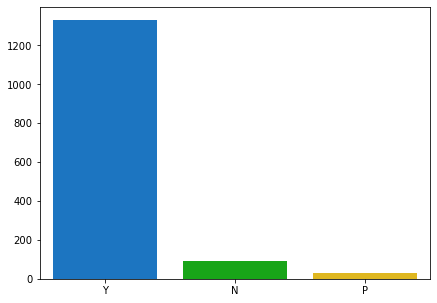

<Figure size 432x288 with 0 Axes>

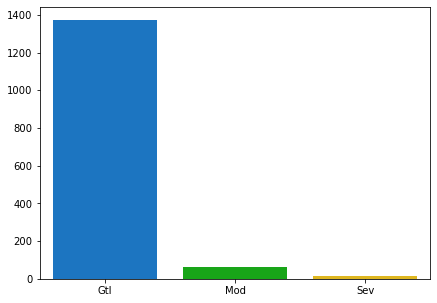

<Figure size 432x288 with 0 Axes>

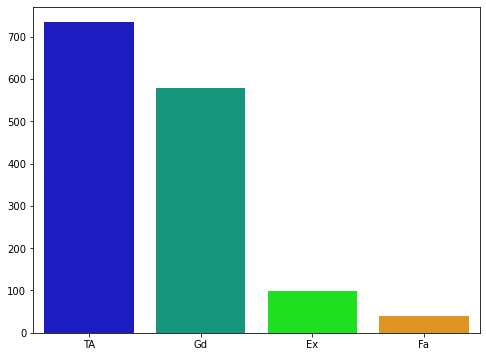

<Figure size 432x288 with 0 Axes>

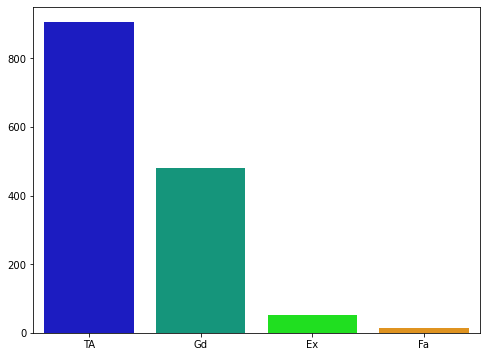

<Figure size 432x288 with 0 Axes>

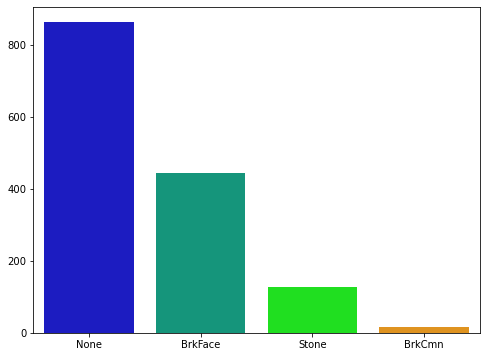

<Figure size 432x288 with 0 Axes>

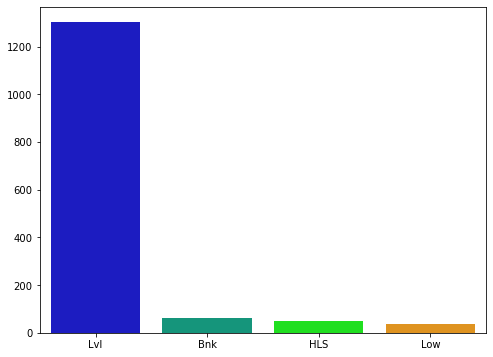

<Figure size 432x288 with 0 Axes>

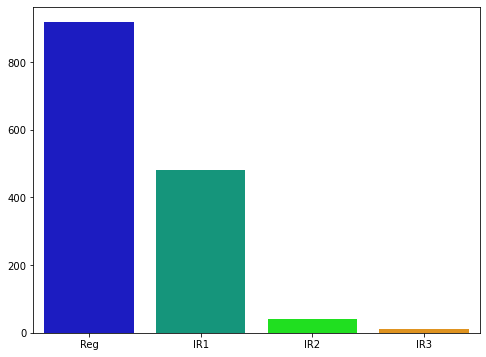

<Figure size 432x288 with 0 Axes>

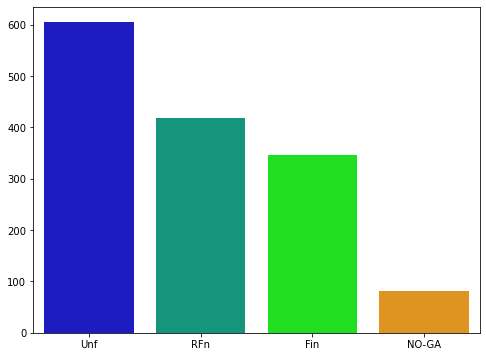

<Figure size 432x288 with 0 Axes>

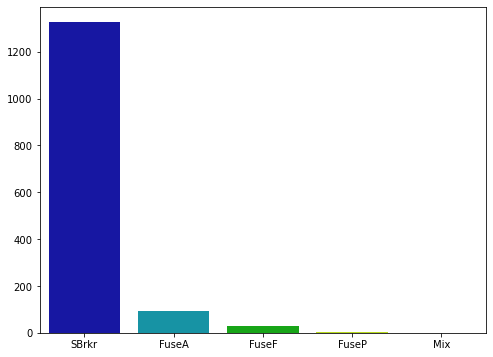

<Figure size 432x288 with 0 Axes>

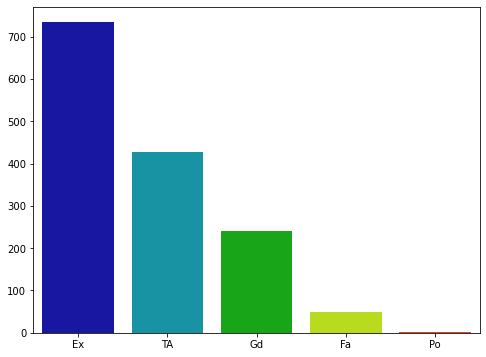

<Figure size 432x288 with 0 Axes>

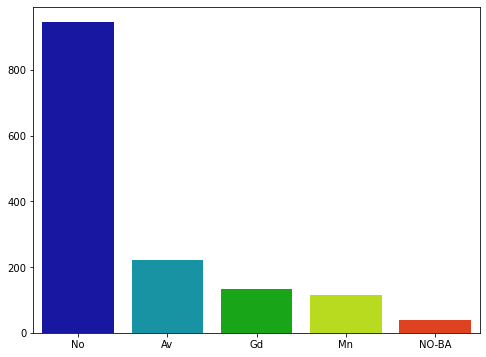

<Figure size 432x288 with 0 Axes>

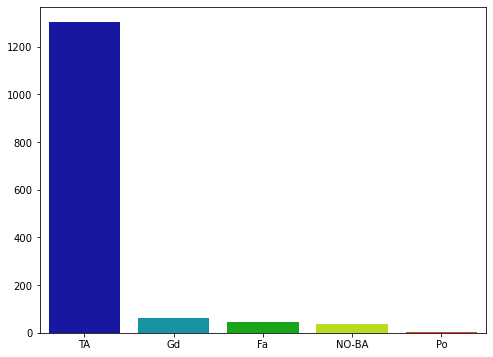

<Figure size 432x288 with 0 Axes>

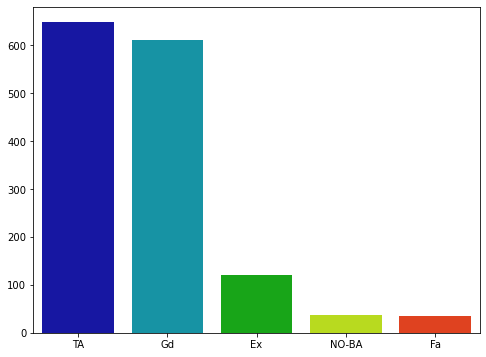

<Figure size 432x288 with 0 Axes>

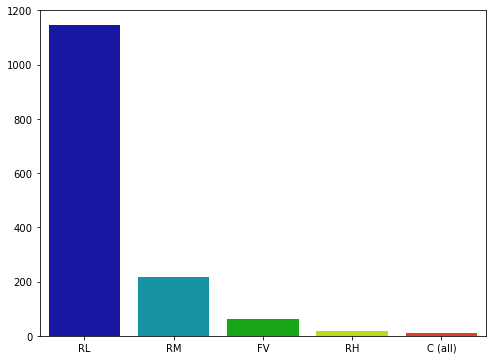

<Figure size 432x288 with 0 Axes>

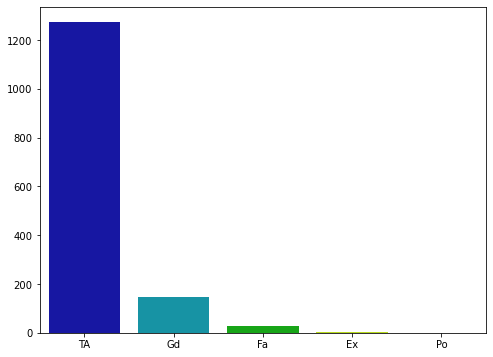

<Figure size 432x288 with 0 Axes>

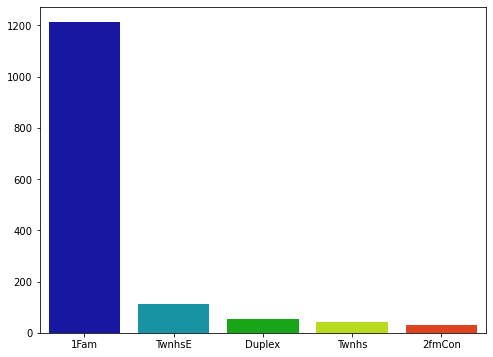

<Figure size 432x288 with 0 Axes>

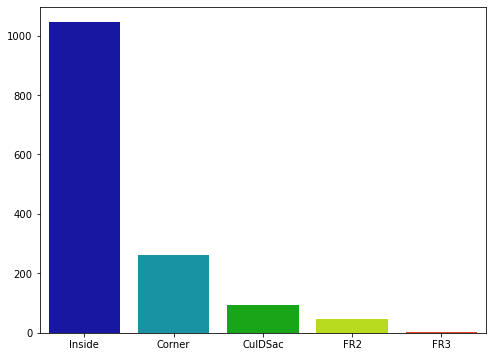

<Figure size 432x288 with 0 Axes>

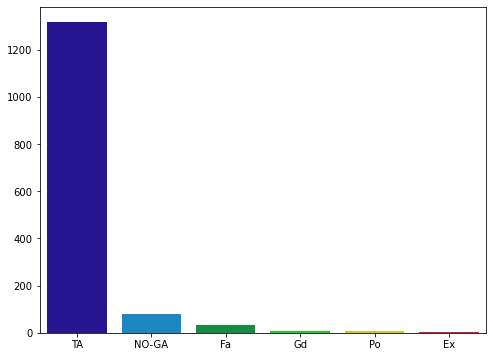

<Figure size 432x288 with 0 Axes>

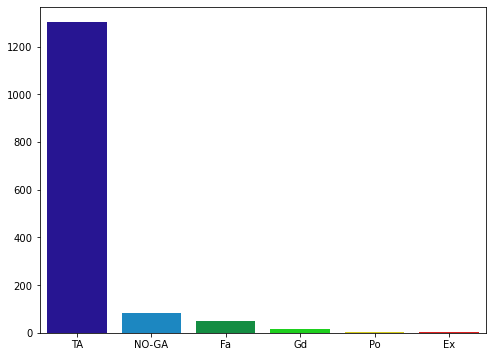

<Figure size 432x288 with 0 Axes>

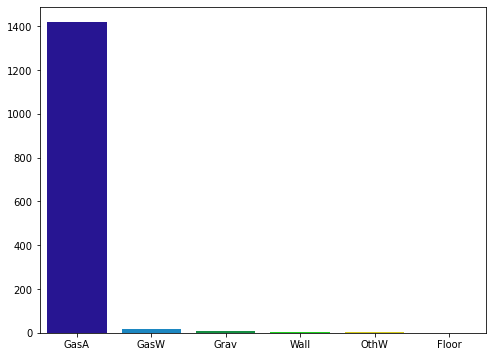

<Figure size 432x288 with 0 Axes>

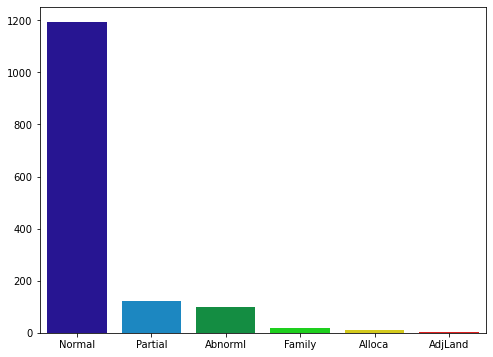

<Figure size 432x288 with 0 Axes>

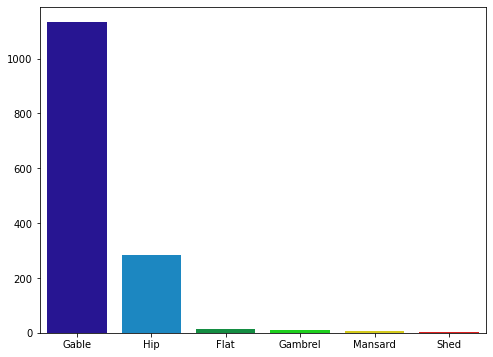

<Figure size 432x288 with 0 Axes>

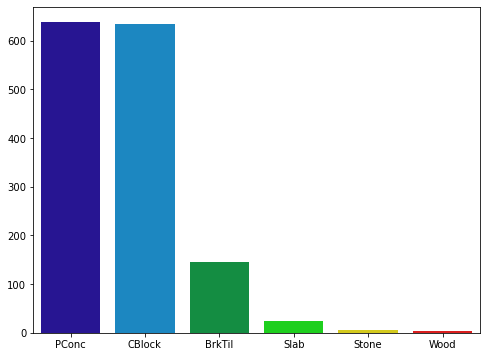

<Figure size 432x288 with 0 Axes>

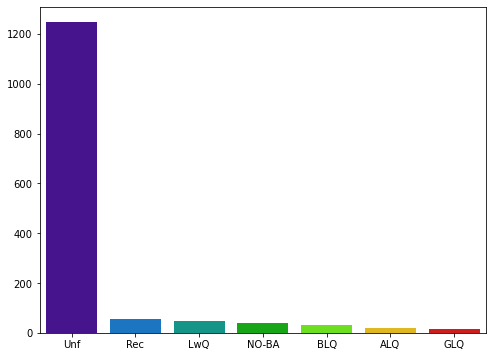

<Figure size 432x288 with 0 Axes>

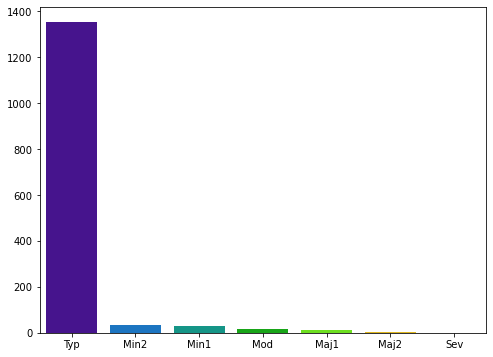

<Figure size 432x288 with 0 Axes>

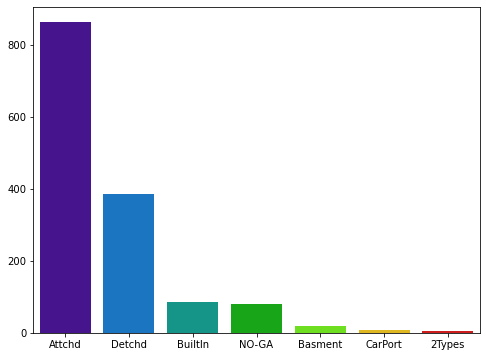

<Figure size 432x288 with 0 Axes>

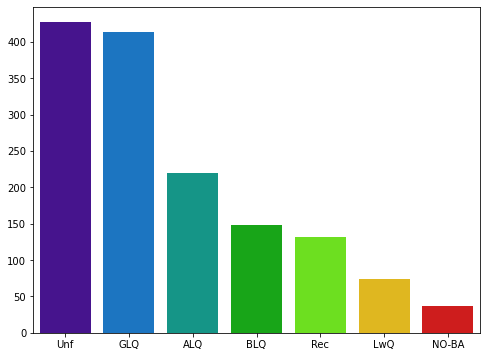

<Figure size 432x288 with 0 Axes>

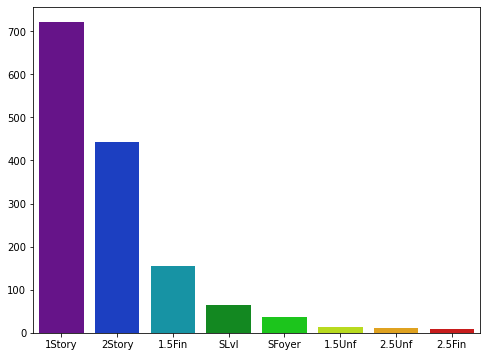

<Figure size 432x288 with 0 Axes>

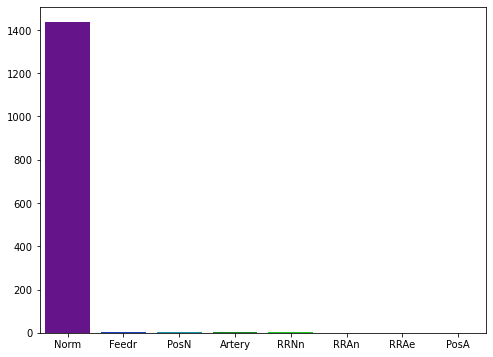

<Figure size 432x288 with 0 Axes>

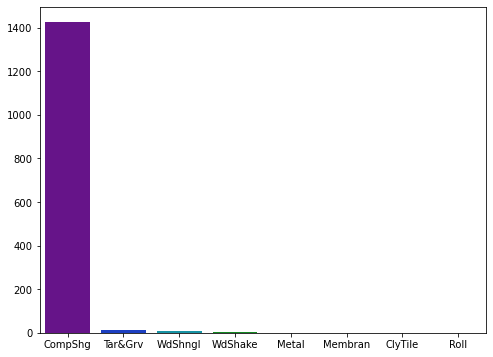

<Figure size 432x288 with 0 Axes>

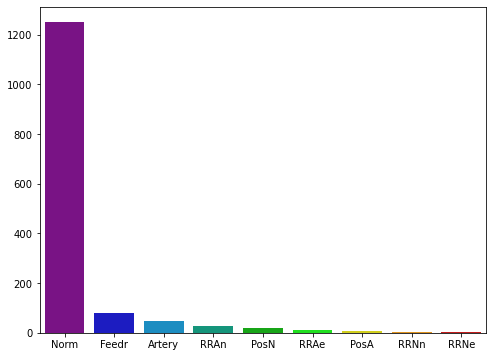

<Figure size 432x288 with 0 Axes>

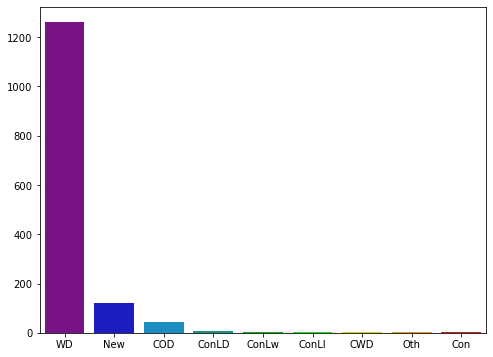

<Figure size 432x288 with 0 Axes>

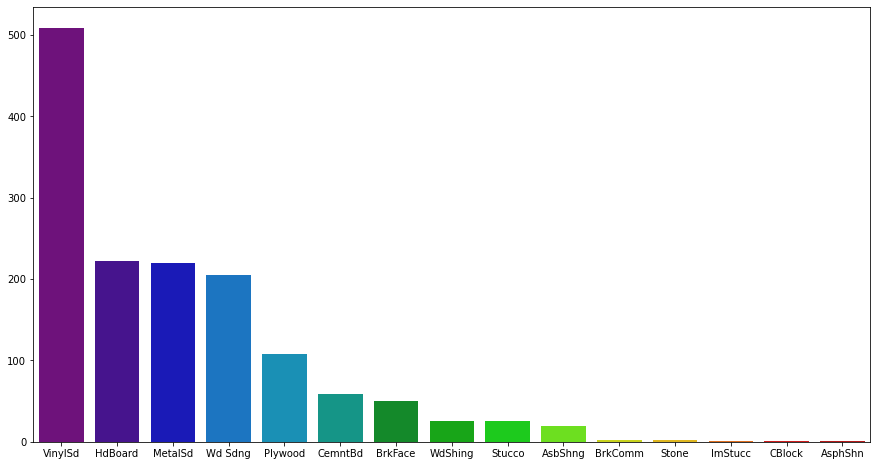

<Figure size 432x288 with 0 Axes>

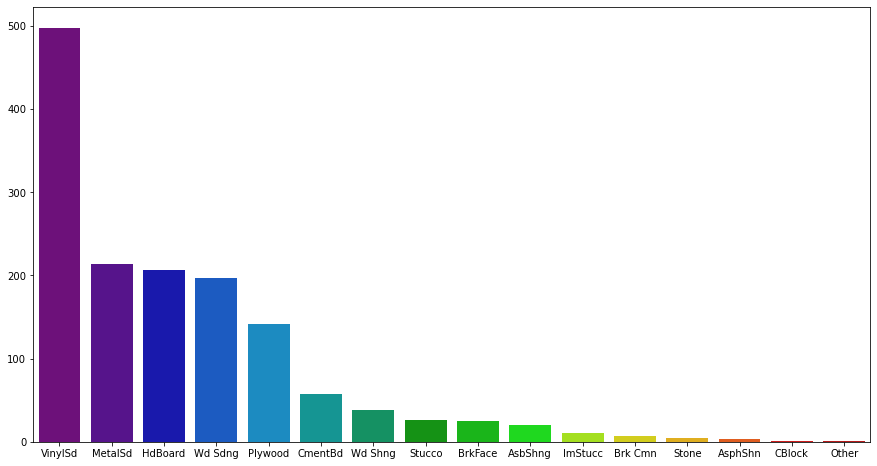

<Figure size 432x288 with 0 Axes>

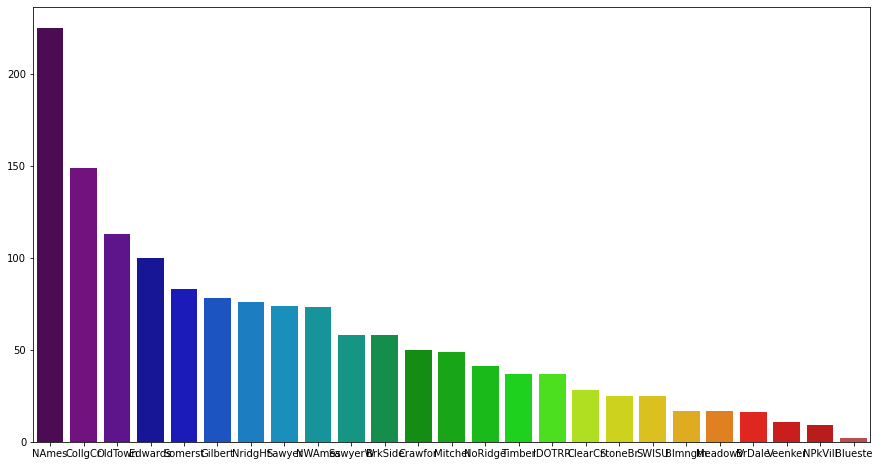

In [35]:
# Plotting box plot on all the categorical variables
for i, val in enumerate(unique_cat):
    if val<4:
        barplots(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        barplots(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        barplots(i, unique_cat.keys()[i], figsize = (15,8))

In [36]:
# Below given function is used to plot multiple boxplots graphs

def boxplots(idx, col, figsize=(10,4)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(surprise_house_data[col], palette=pat[random.randint(0,len(pat)-1)])
    plt.show()

<Figure size 432x288 with 0 Axes>

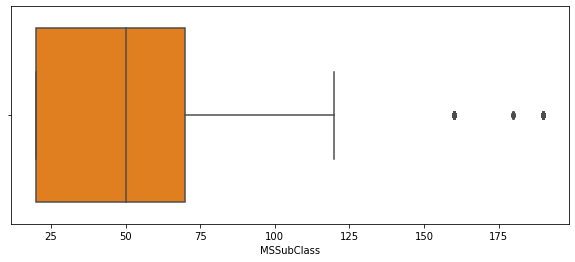

<Figure size 432x288 with 0 Axes>

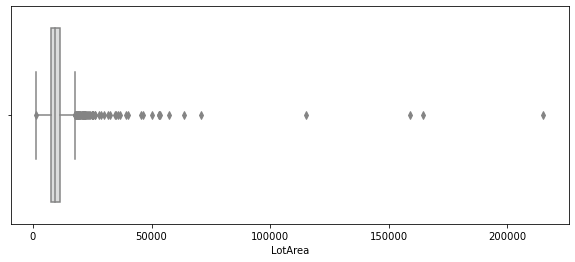

<Figure size 432x288 with 0 Axes>

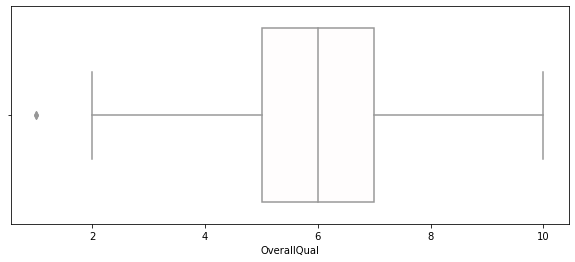

<Figure size 432x288 with 0 Axes>

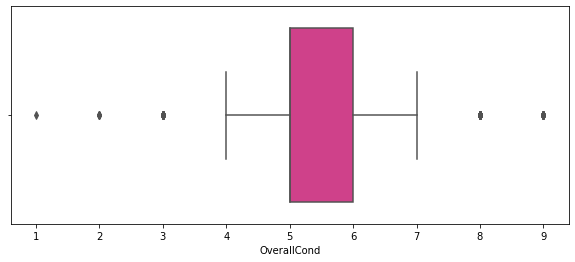

<Figure size 432x288 with 0 Axes>

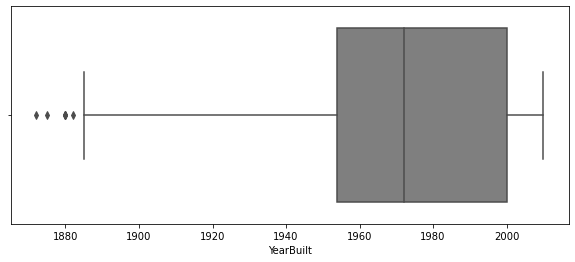

<Figure size 432x288 with 0 Axes>

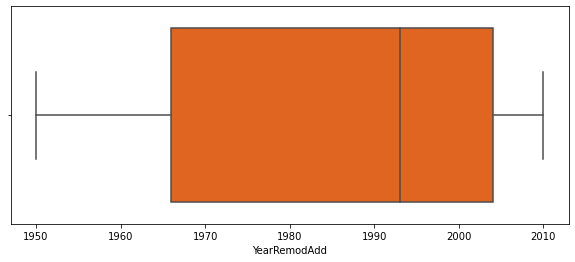

<Figure size 432x288 with 0 Axes>

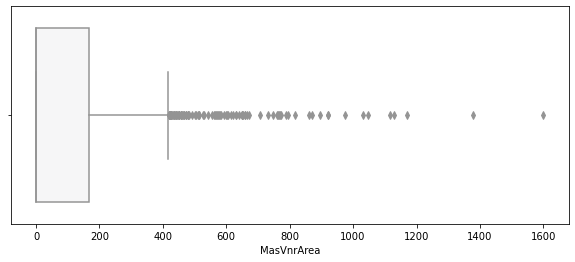

<Figure size 432x288 with 0 Axes>

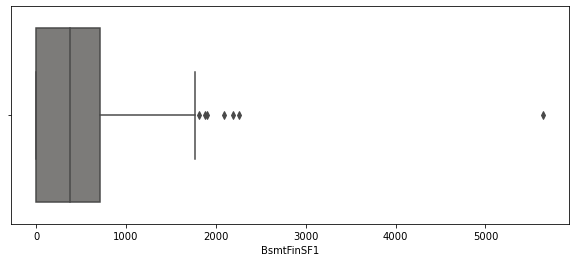

<Figure size 432x288 with 0 Axes>

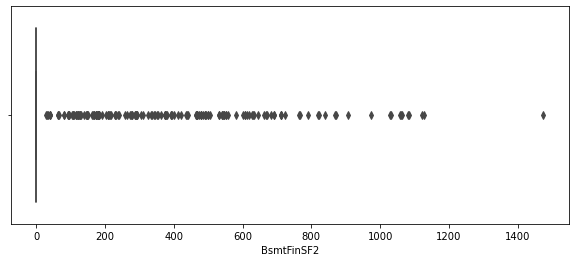

<Figure size 432x288 with 0 Axes>

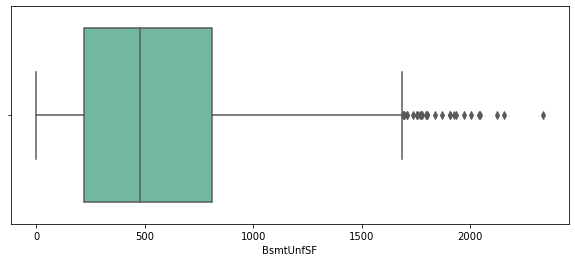

<Figure size 432x288 with 0 Axes>

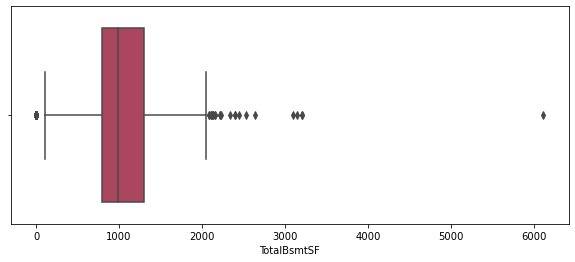

<Figure size 432x288 with 0 Axes>

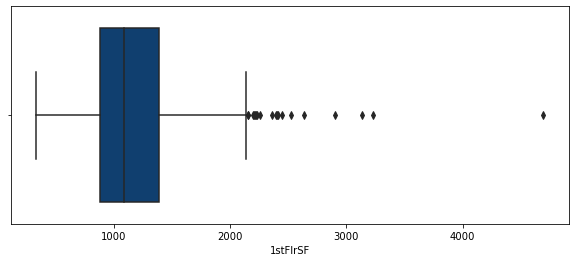

<Figure size 432x288 with 0 Axes>

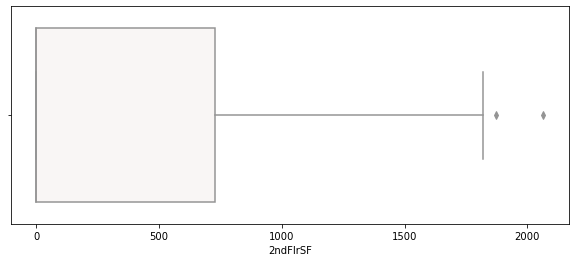

<Figure size 432x288 with 0 Axes>

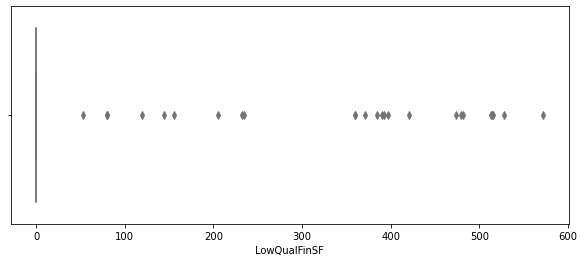

<Figure size 432x288 with 0 Axes>

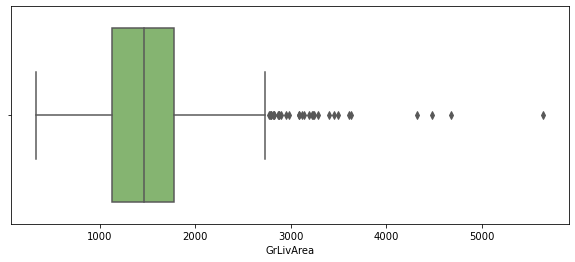

<Figure size 432x288 with 0 Axes>

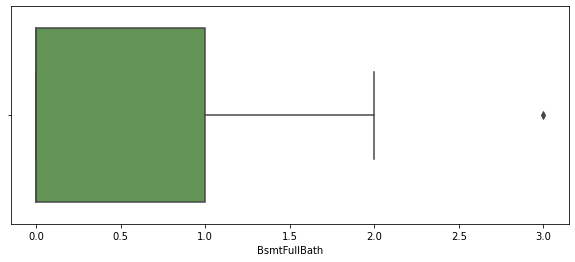

<Figure size 432x288 with 0 Axes>

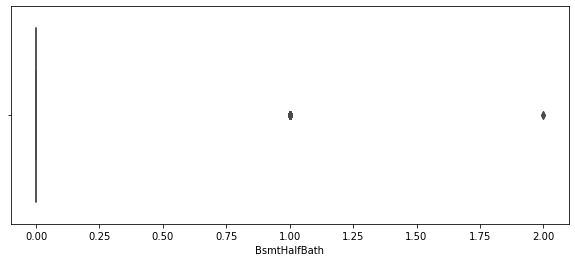

<Figure size 432x288 with 0 Axes>

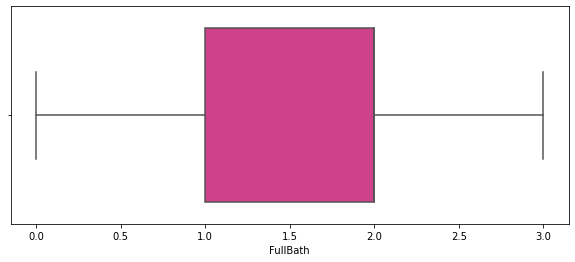

<Figure size 432x288 with 0 Axes>

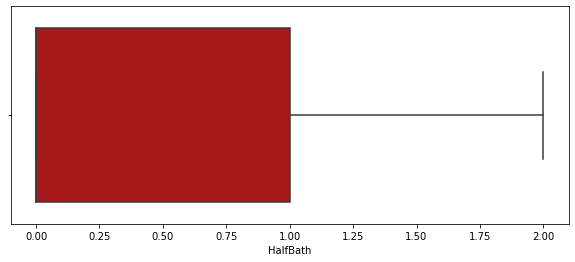

<Figure size 432x288 with 0 Axes>

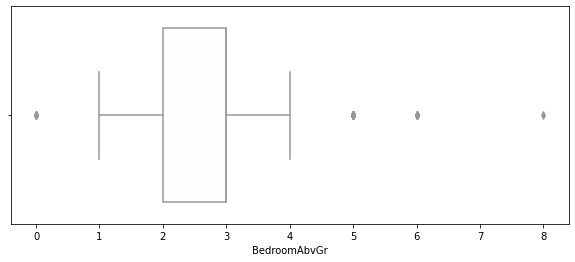

<Figure size 432x288 with 0 Axes>

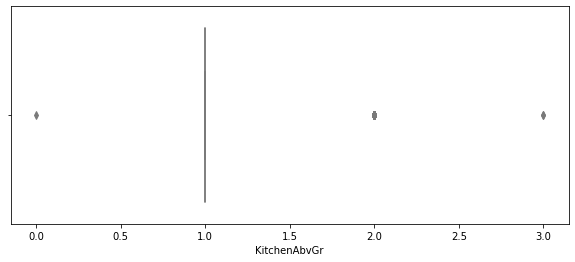

<Figure size 432x288 with 0 Axes>

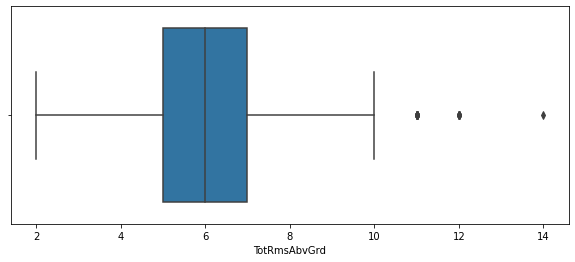

<Figure size 432x288 with 0 Axes>

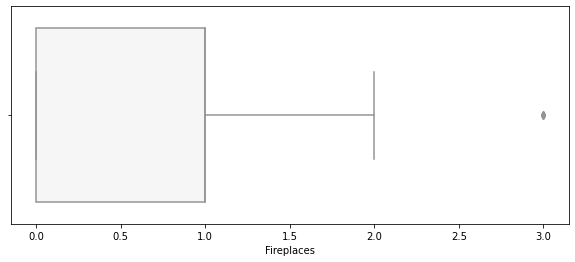

<Figure size 432x288 with 0 Axes>

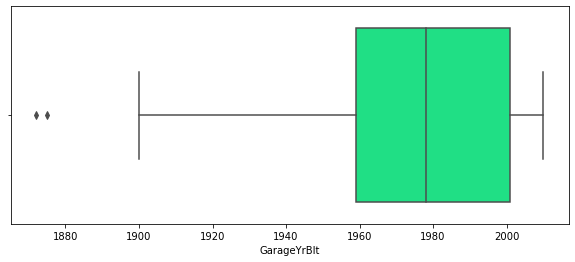

<Figure size 432x288 with 0 Axes>

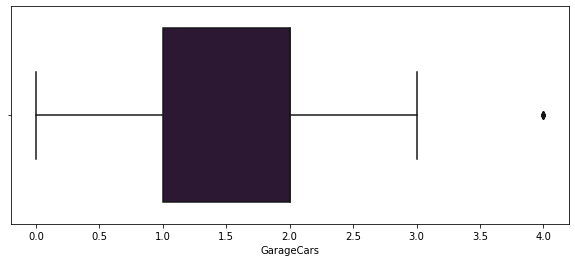

<Figure size 432x288 with 0 Axes>

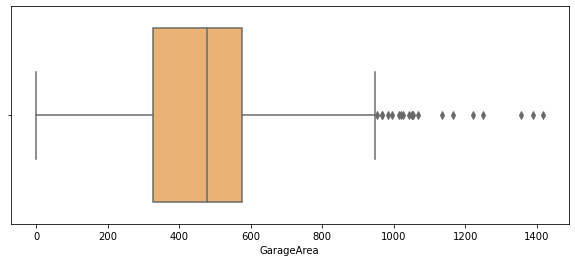

<Figure size 432x288 with 0 Axes>

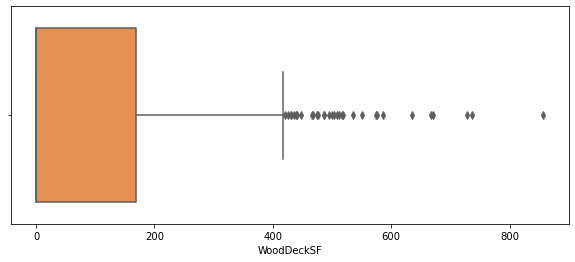

<Figure size 432x288 with 0 Axes>

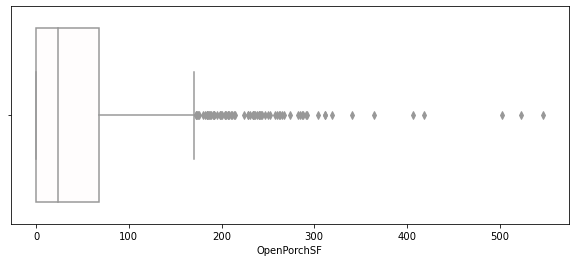

<Figure size 432x288 with 0 Axes>

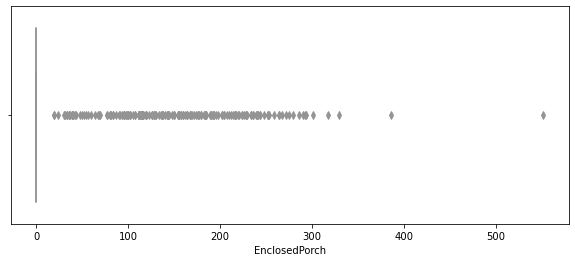

<Figure size 432x288 with 0 Axes>

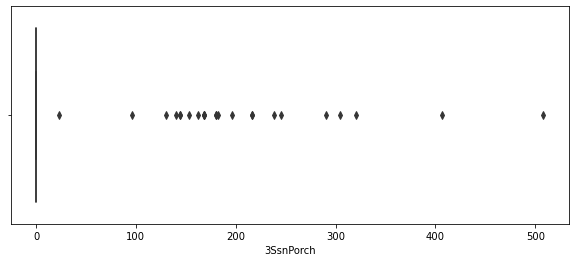

<Figure size 432x288 with 0 Axes>

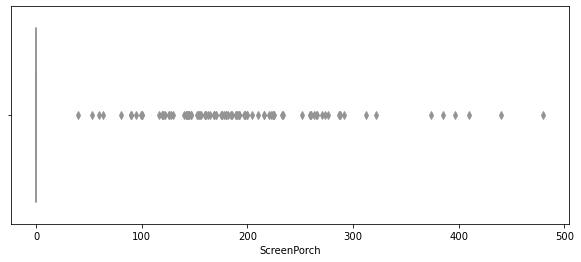

<Figure size 432x288 with 0 Axes>

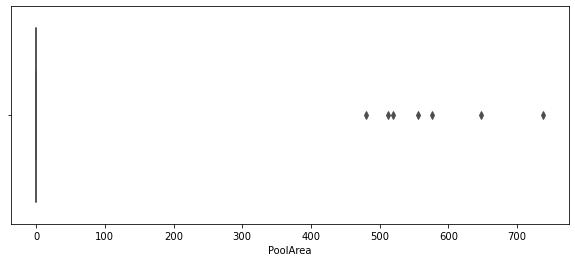

<Figure size 432x288 with 0 Axes>

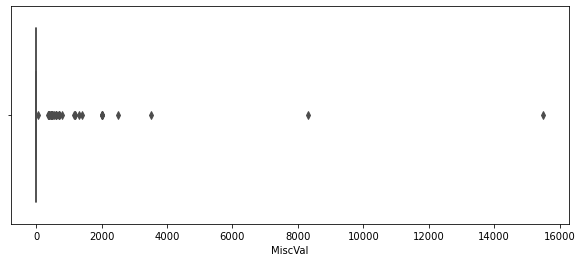

<Figure size 432x288 with 0 Axes>

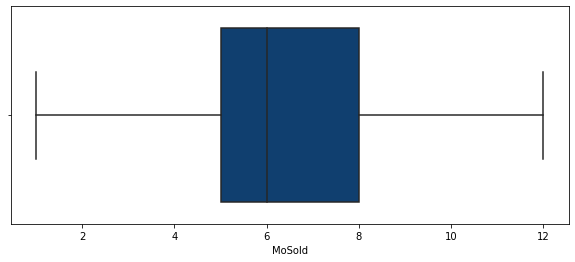

<Figure size 432x288 with 0 Axes>

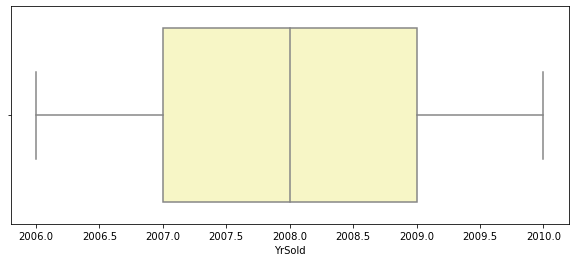

<Figure size 432x288 with 0 Axes>

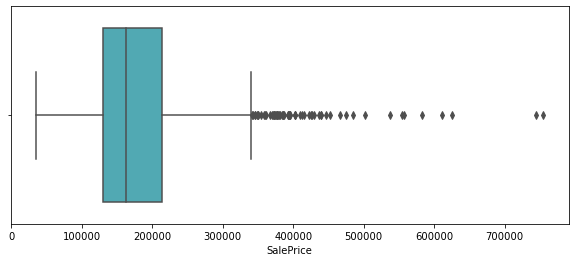

In [37]:
pat = 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
for i, col in enumerate(numeric.columns):
    boxplots(i, col)

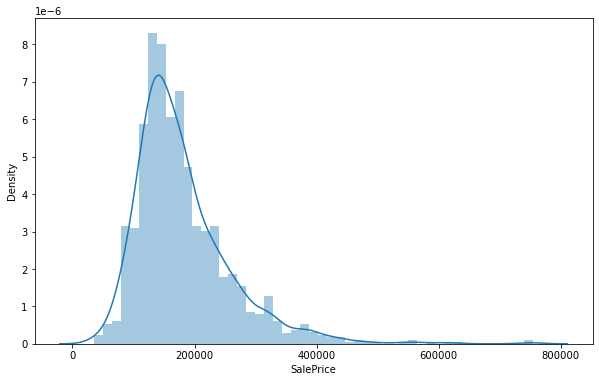

In [38]:
# Plotting a distribution plot on "SalePrice"
plt.figure(figsize=(10,6))
sns.distplot(surprise_house_data.SalePrice)
plt.show()

- We can see that SalePrice is Right skewed 
- To make correction we can use Log on it.

### b. Bivarent Analysis

In [39]:
# This function is used to plot box plot for two variables. Here constant variable is SalePrice.
def bi_boxplot(idx, col, figsize = (7,7)):
    plt.figure(idx)
    plt.figure(figsize=figsize)
    sns.boxplot(x=col, y="SalePrice", data=surprise_house_data)
    plt.show()

<Figure size 432x288 with 0 Axes>

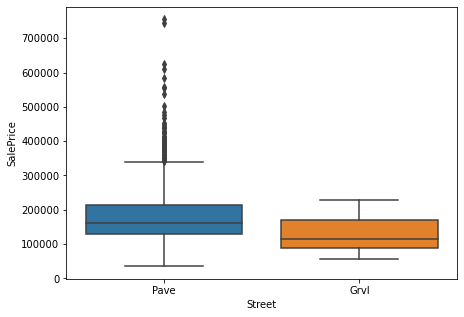

<Figure size 432x288 with 0 Axes>

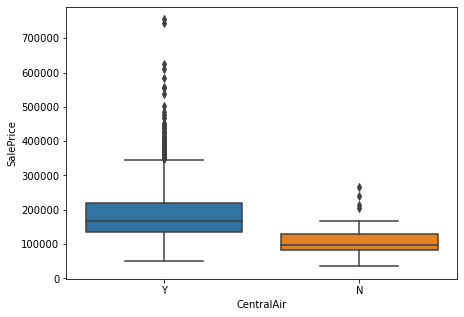

<Figure size 432x288 with 0 Axes>

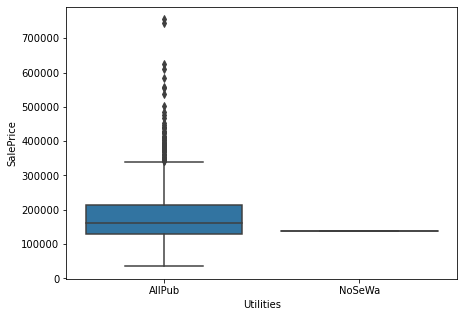

<Figure size 432x288 with 0 Axes>

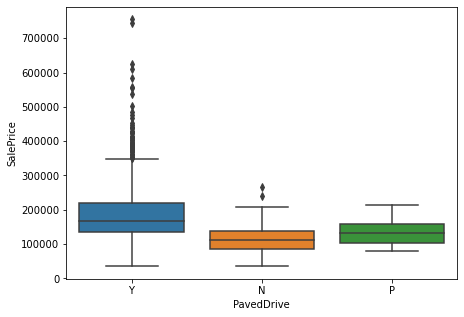

<Figure size 432x288 with 0 Axes>

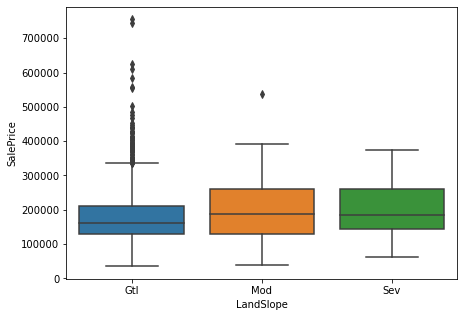

<Figure size 432x288 with 0 Axes>

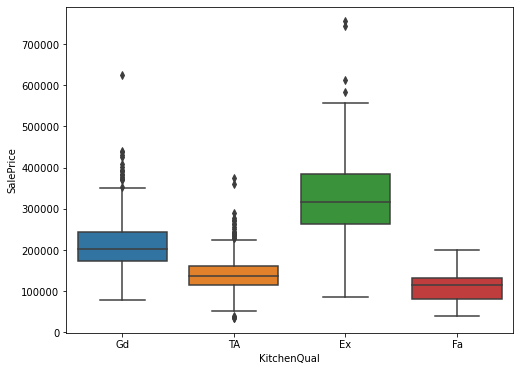

<Figure size 432x288 with 0 Axes>

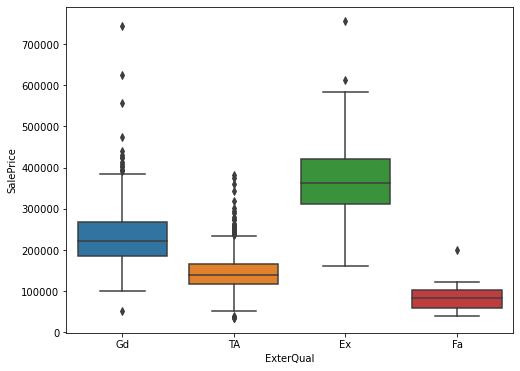

<Figure size 432x288 with 0 Axes>

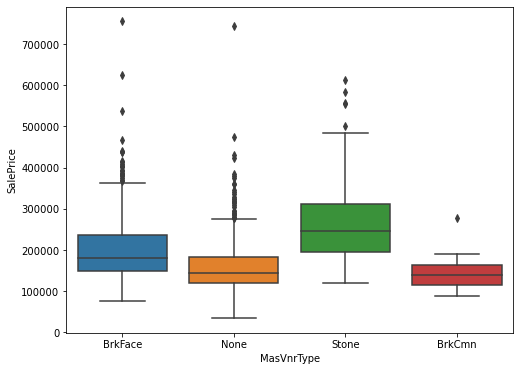

<Figure size 432x288 with 0 Axes>

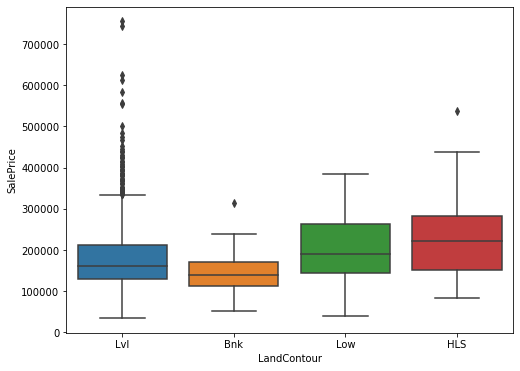

<Figure size 432x288 with 0 Axes>

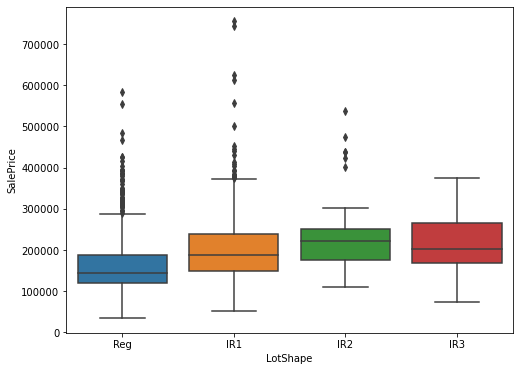

<Figure size 432x288 with 0 Axes>

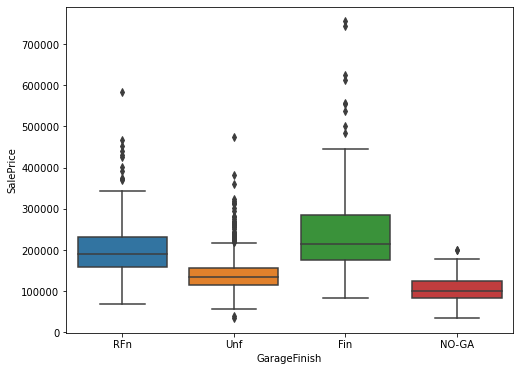

<Figure size 432x288 with 0 Axes>

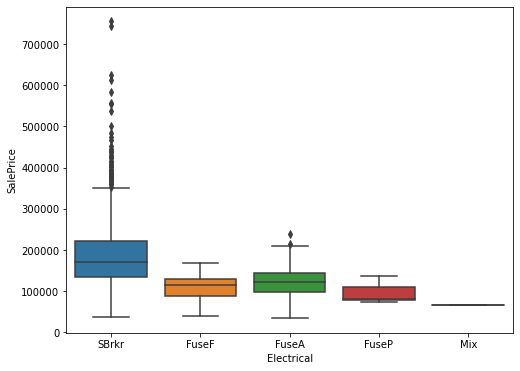

<Figure size 432x288 with 0 Axes>

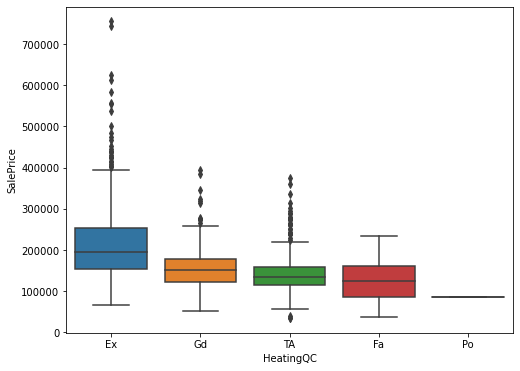

<Figure size 432x288 with 0 Axes>

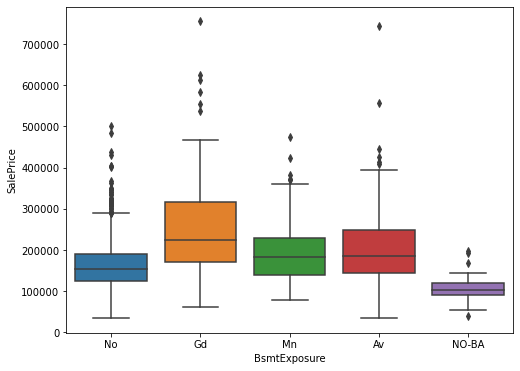

<Figure size 432x288 with 0 Axes>

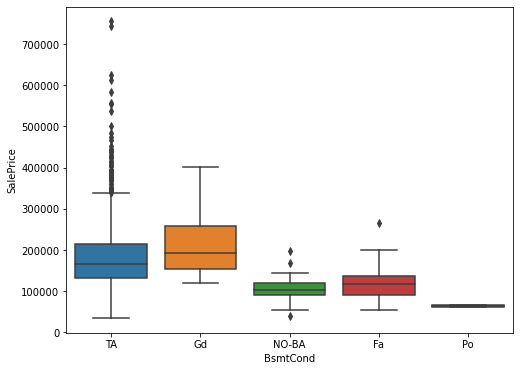

<Figure size 432x288 with 0 Axes>

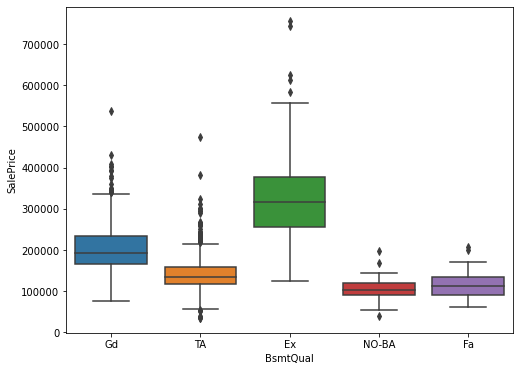

<Figure size 432x288 with 0 Axes>

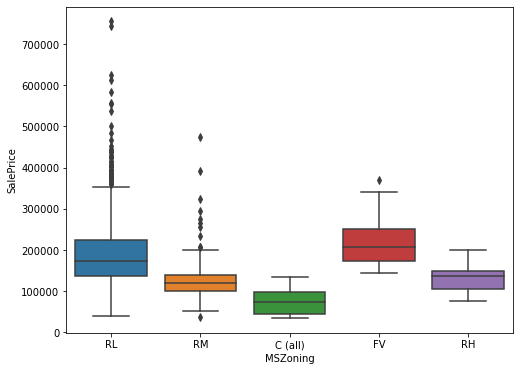

<Figure size 432x288 with 0 Axes>

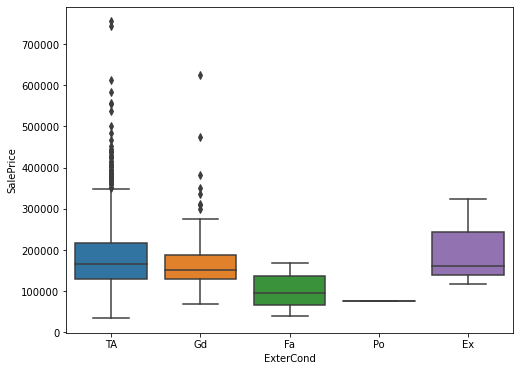

<Figure size 432x288 with 0 Axes>

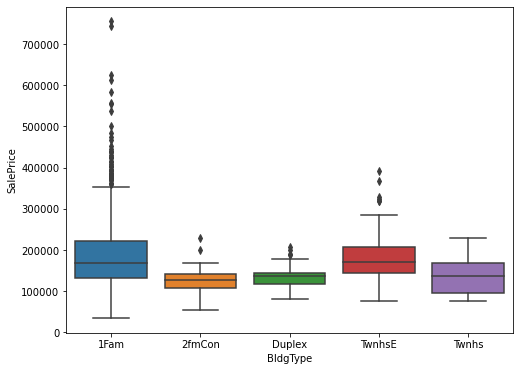

<Figure size 432x288 with 0 Axes>

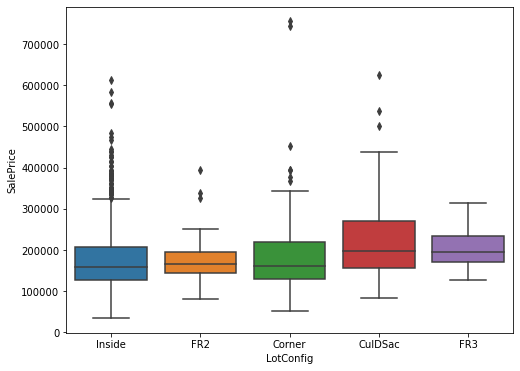

<Figure size 432x288 with 0 Axes>

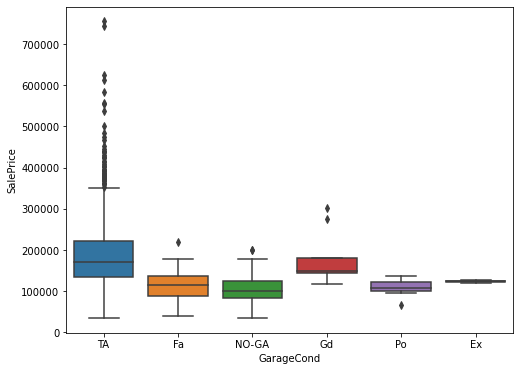

<Figure size 432x288 with 0 Axes>

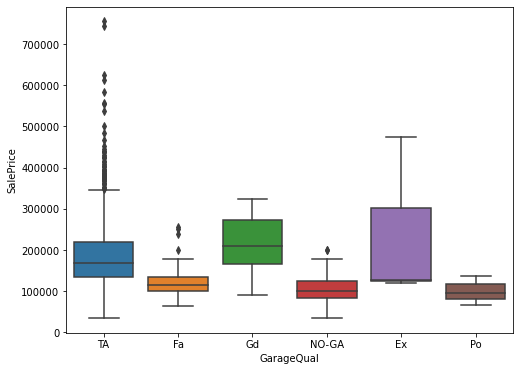

<Figure size 432x288 with 0 Axes>

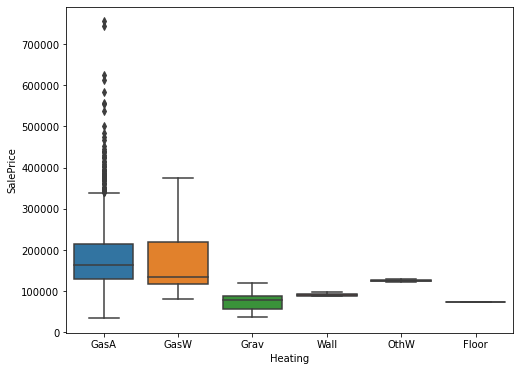

<Figure size 432x288 with 0 Axes>

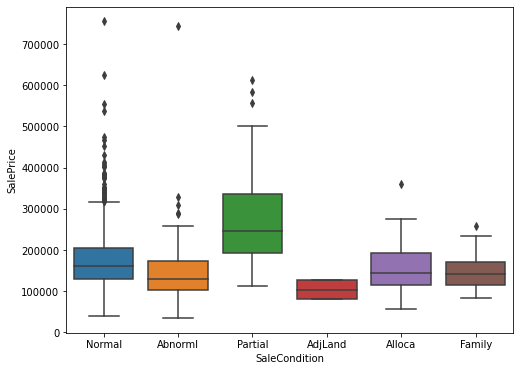

<Figure size 432x288 with 0 Axes>

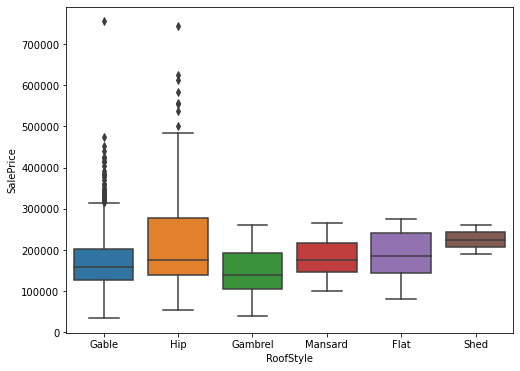

<Figure size 432x288 with 0 Axes>

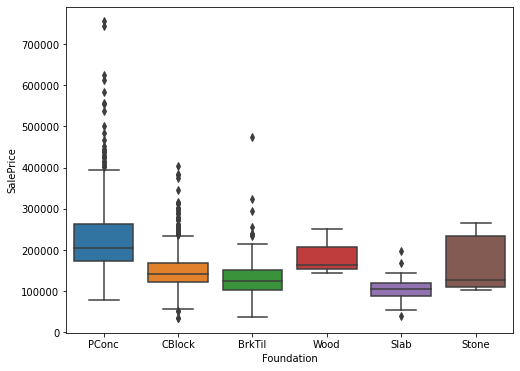

<Figure size 432x288 with 0 Axes>

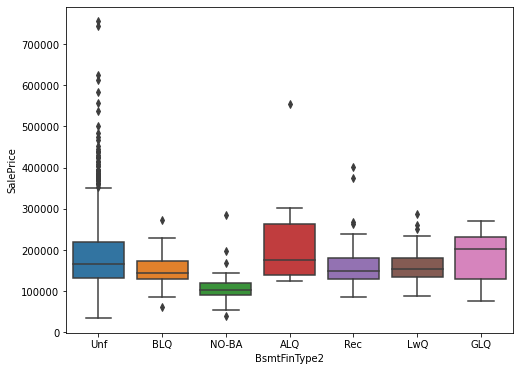

<Figure size 432x288 with 0 Axes>

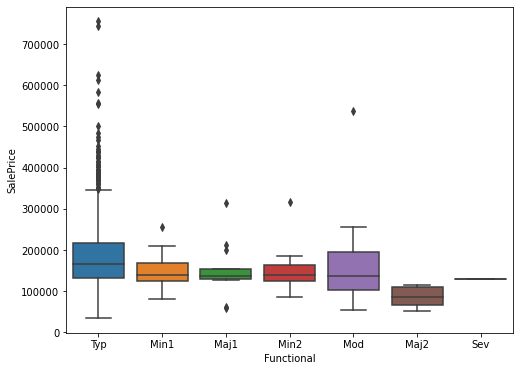

<Figure size 432x288 with 0 Axes>

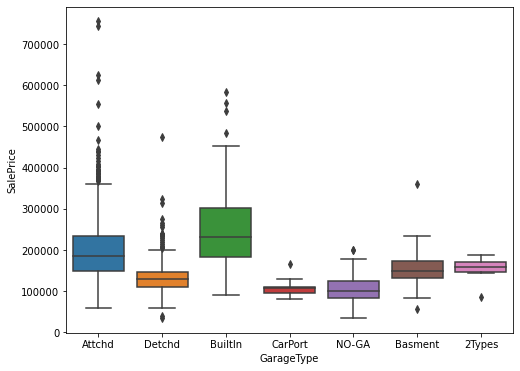

<Figure size 432x288 with 0 Axes>

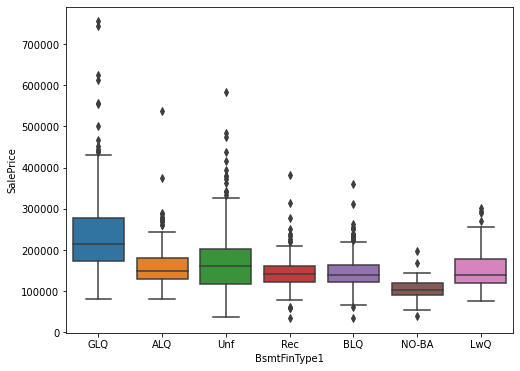

<Figure size 432x288 with 0 Axes>

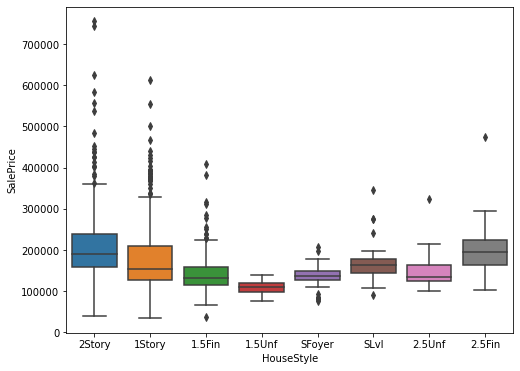

<Figure size 432x288 with 0 Axes>

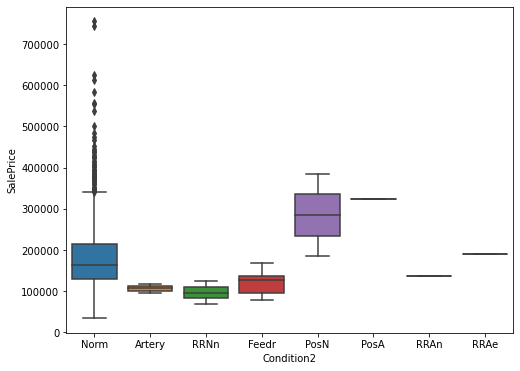

<Figure size 432x288 with 0 Axes>

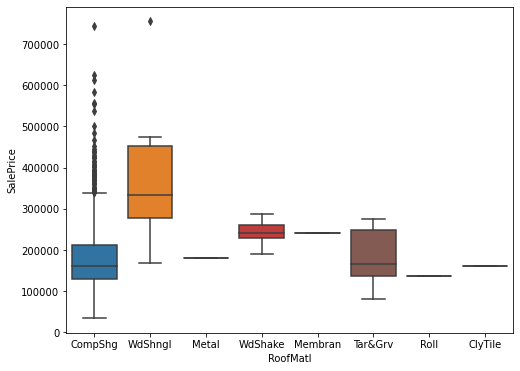

<Figure size 432x288 with 0 Axes>

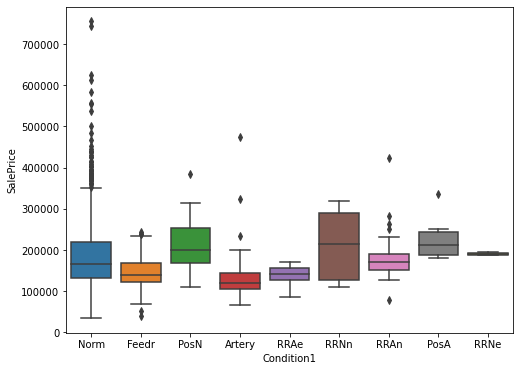

<Figure size 432x288 with 0 Axes>

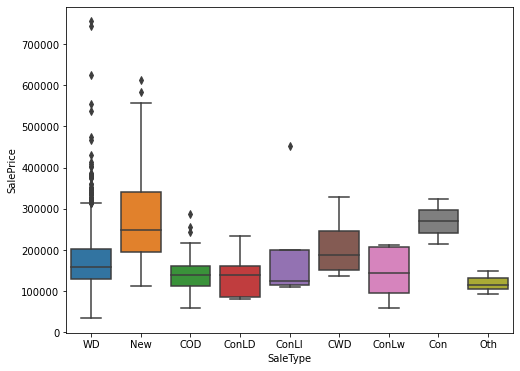

<Figure size 432x288 with 0 Axes>

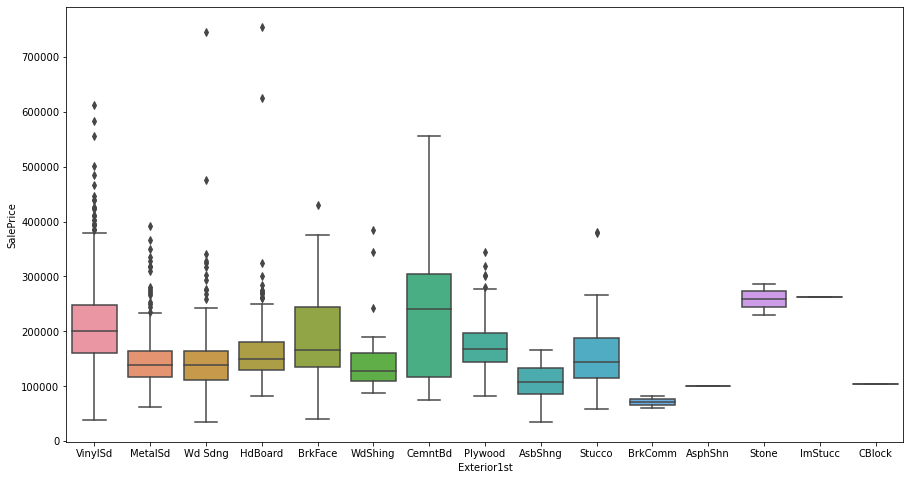

<Figure size 432x288 with 0 Axes>

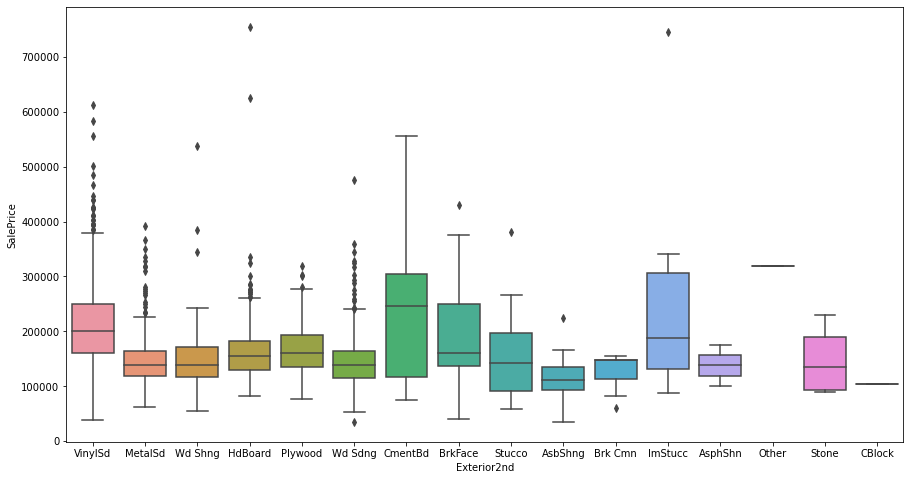

<Figure size 432x288 with 0 Axes>

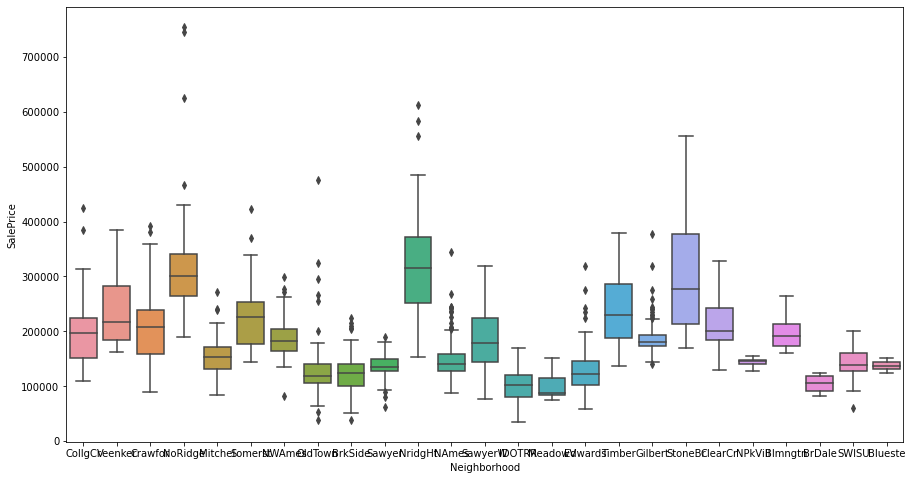

In [40]:
for i, val in enumerate(unique_cat):
    if val<4:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (7,5))
    elif val<10:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (8,6))
    else:
        bi_boxplot(i, unique_cat.keys()[i], figsize = (15,8))

In [41]:
# This function used to plot joinplots for two variables. Here constant variable is SalePrice
def joinplots(idx, col):
    plt.figure(idx)
    sns.jointplot(x=col, y="SalePrice", data=surprise_house_data)
    plt.show()

<Figure size 432x288 with 0 Axes>

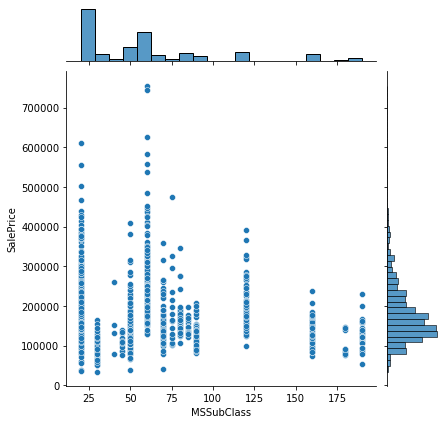

<Figure size 432x288 with 0 Axes>

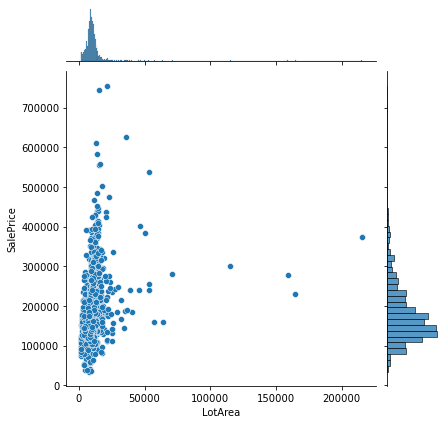

<Figure size 432x288 with 0 Axes>

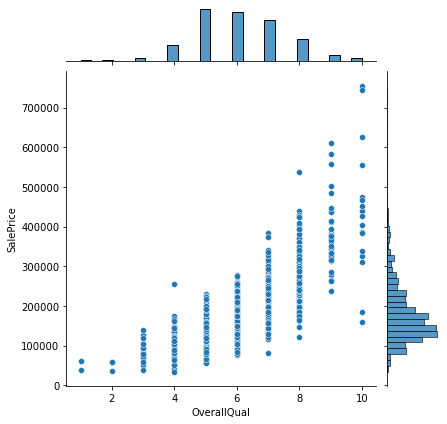

<Figure size 432x288 with 0 Axes>

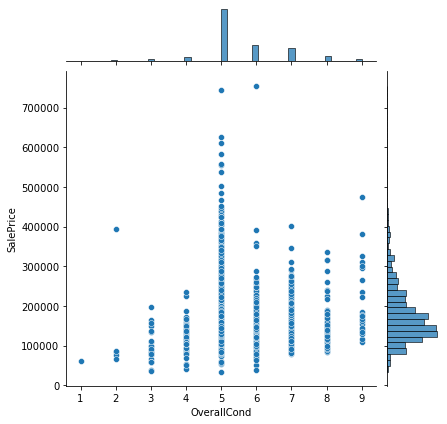

<Figure size 432x288 with 0 Axes>

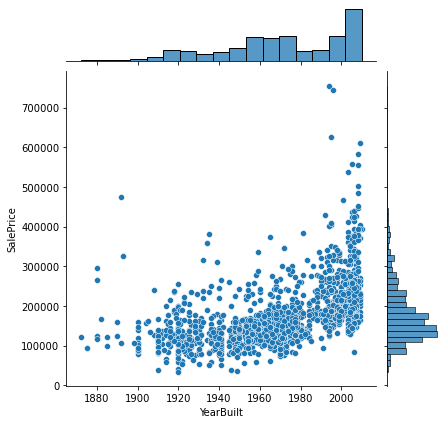

<Figure size 432x288 with 0 Axes>

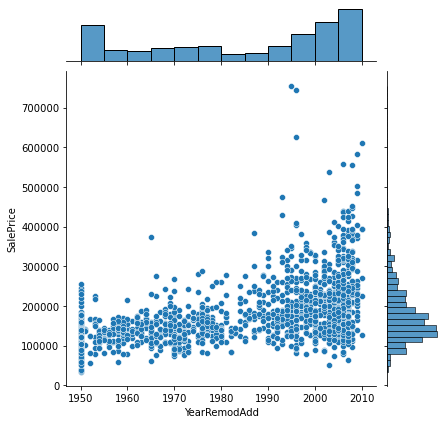

<Figure size 432x288 with 0 Axes>

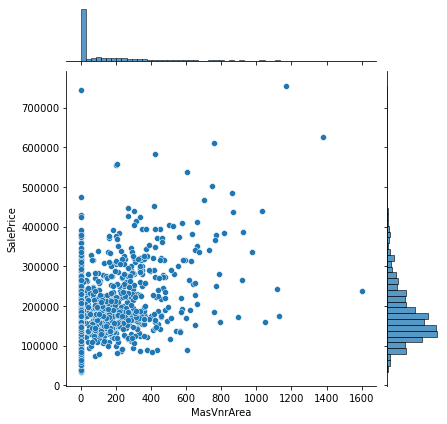

<Figure size 432x288 with 0 Axes>

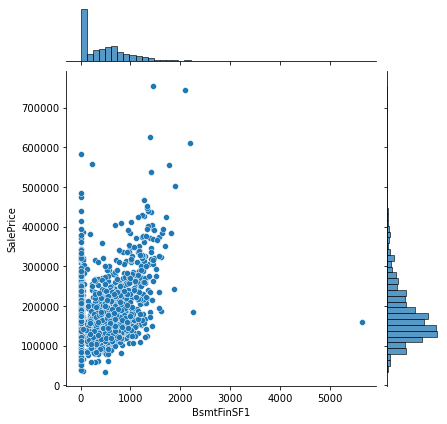

<Figure size 432x288 with 0 Axes>

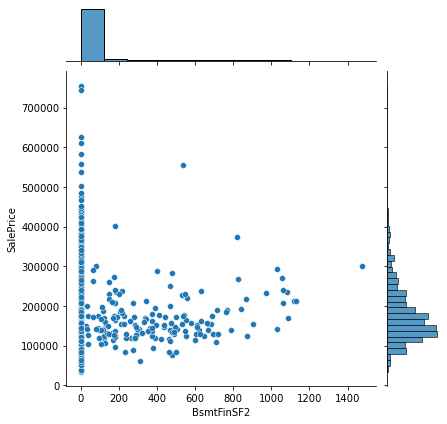

<Figure size 432x288 with 0 Axes>

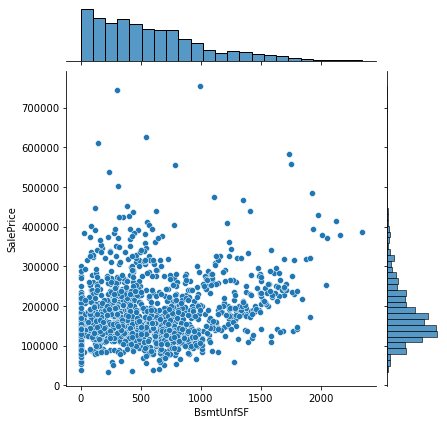

<Figure size 432x288 with 0 Axes>

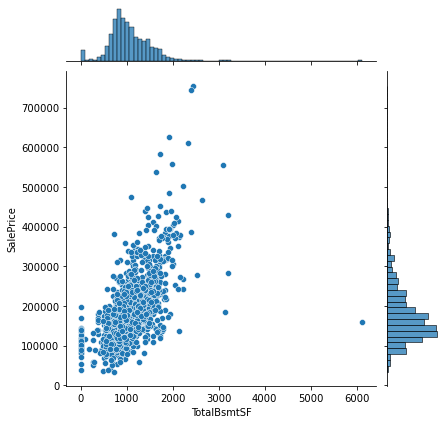

<Figure size 432x288 with 0 Axes>

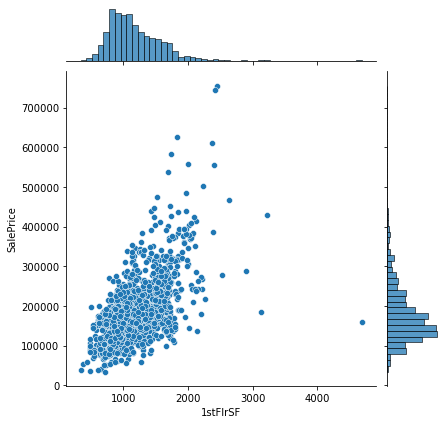

<Figure size 432x288 with 0 Axes>

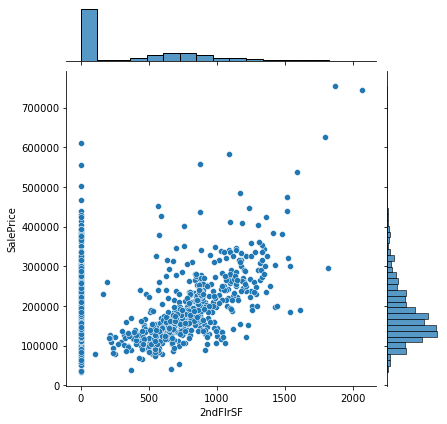

<Figure size 432x288 with 0 Axes>

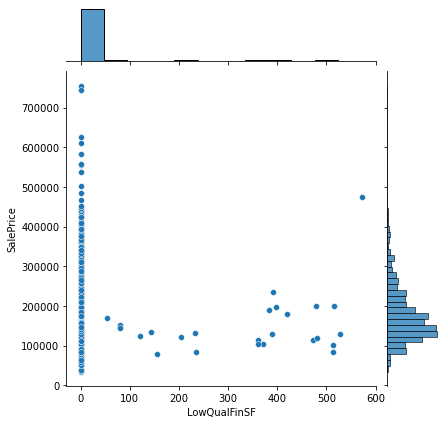

<Figure size 432x288 with 0 Axes>

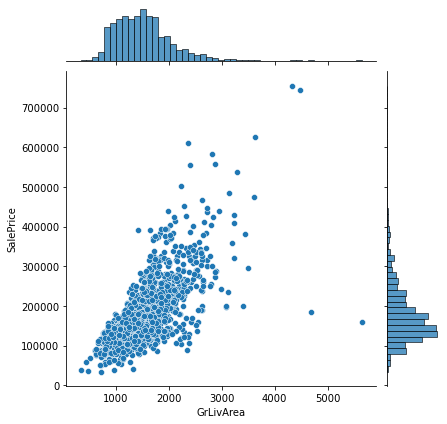

<Figure size 432x288 with 0 Axes>

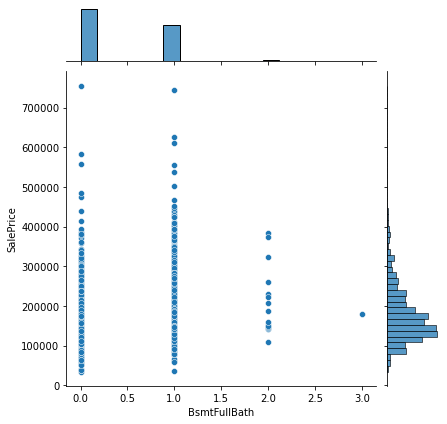

<Figure size 432x288 with 0 Axes>

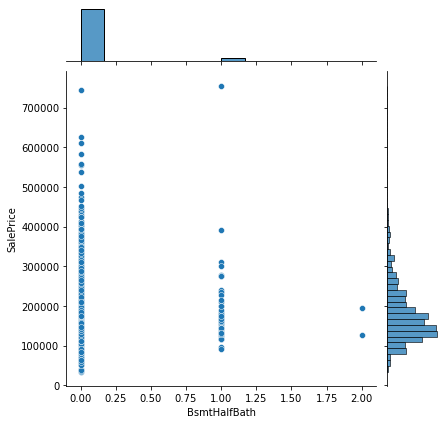

<Figure size 432x288 with 0 Axes>

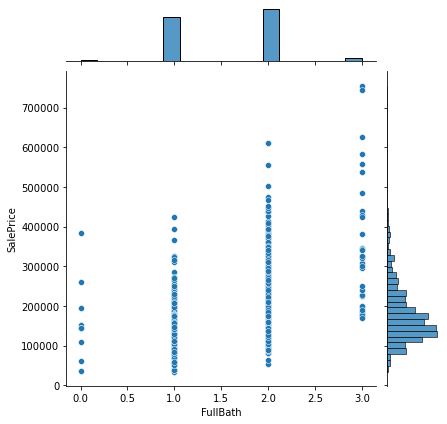

<Figure size 432x288 with 0 Axes>

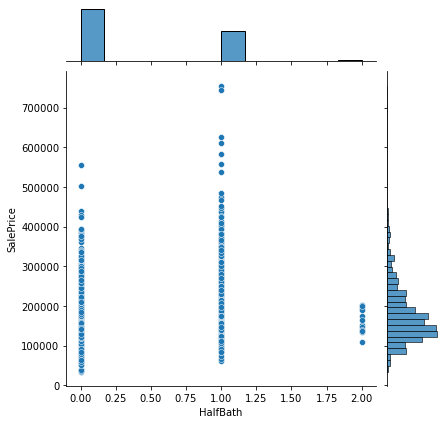

<Figure size 432x288 with 0 Axes>

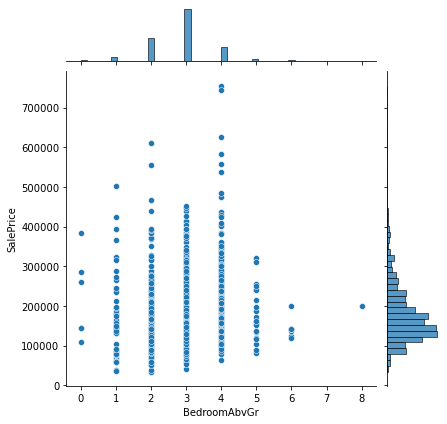

<Figure size 432x288 with 0 Axes>

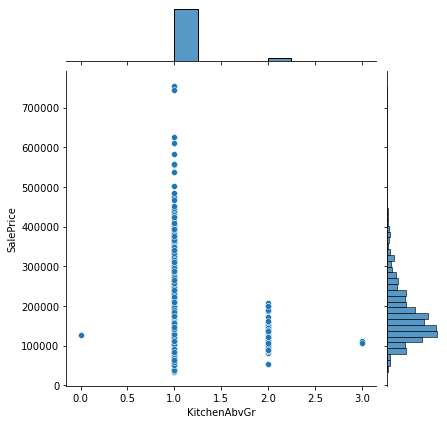

<Figure size 432x288 with 0 Axes>

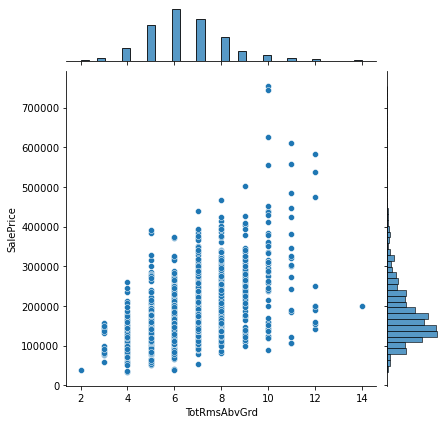

<Figure size 432x288 with 0 Axes>

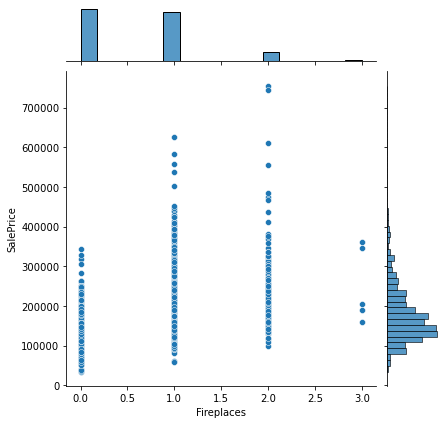

<Figure size 432x288 with 0 Axes>

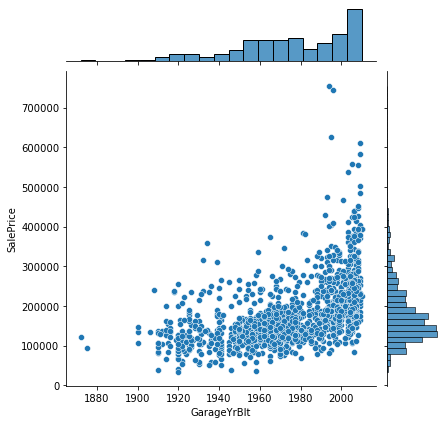

<Figure size 432x288 with 0 Axes>

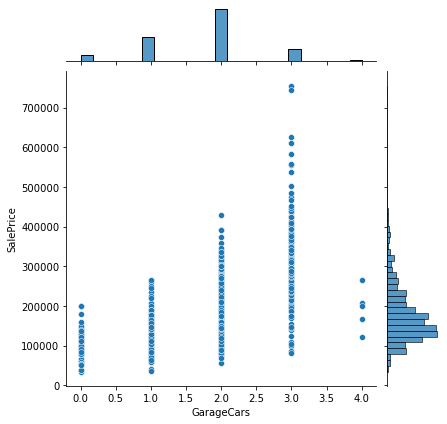

<Figure size 432x288 with 0 Axes>

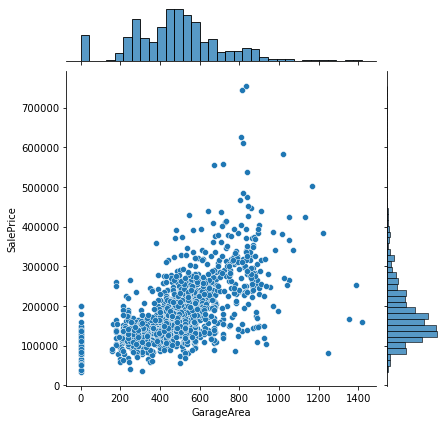

<Figure size 432x288 with 0 Axes>

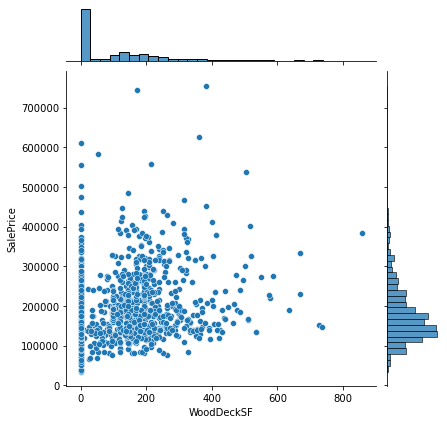

<Figure size 432x288 with 0 Axes>

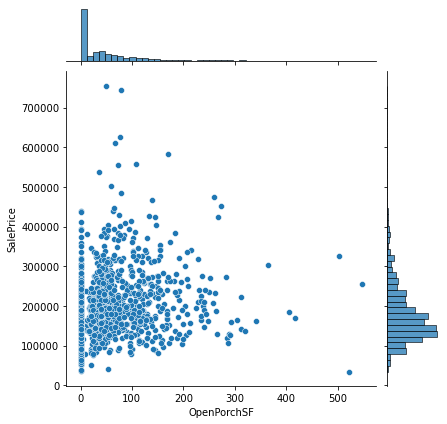

<Figure size 432x288 with 0 Axes>

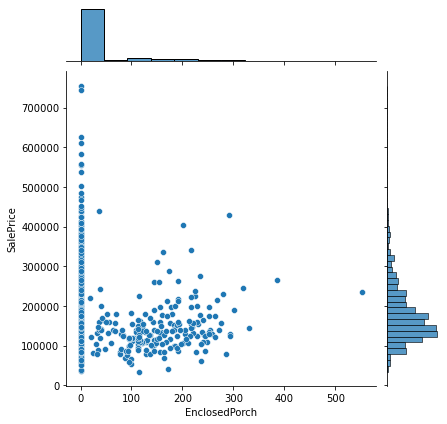

<Figure size 432x288 with 0 Axes>

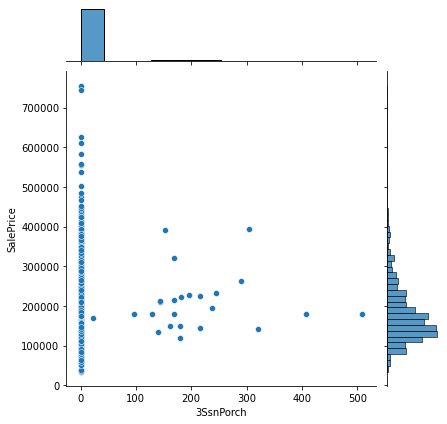

<Figure size 432x288 with 0 Axes>

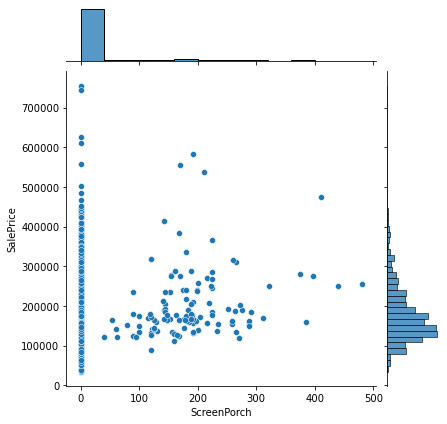

<Figure size 432x288 with 0 Axes>

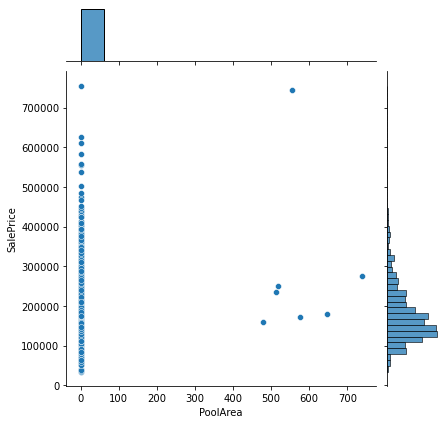

<Figure size 432x288 with 0 Axes>

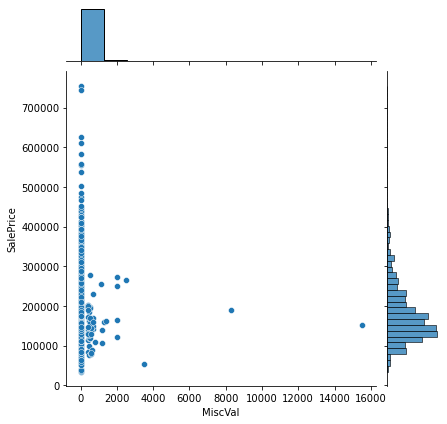

<Figure size 432x288 with 0 Axes>

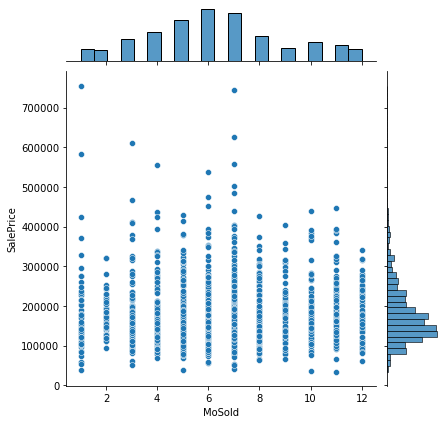

<Figure size 432x288 with 0 Axes>

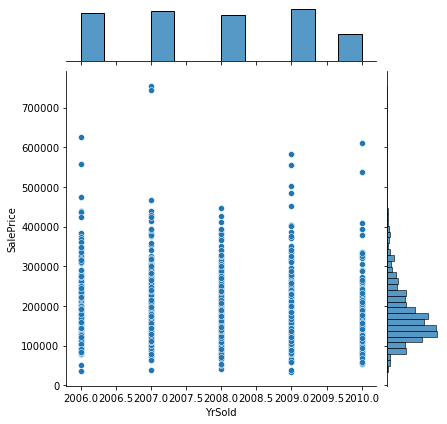

In [42]:
for i, col in enumerate(numeric.columns):
    if col!="SalePrice":
        joinplots(i, col)

### c. Multivarent Analysis

In [43]:
cor_house = surprise_house_data.corr()
cor_house

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.138039     0.034799    -0.061147   0.027979   
LotArea         -0.138039  1.000000     0.106305    -0.002297   0.015708   
OverallQual      0.034799  0.106305     1.000000    -0.090940   0.572129   
OverallCond     -0.061147 -0.002297    -0.090940     1.000000  -0.376557   
YearBuilt        0.027979  0.015708     0.572129    -0.376557   1.000000   
YearRemodAdd     0.040664  0.015190     0.550499     0.075545   0.590324   
MasVnrArea       0.023156  0.104141     0.411699    -0.128333   0.316345   
BsmtFinSF1      -0.069241  0.213081     0.236421    -0.042292   0.250209   
BsmtFinSF2      -0.066037  0.111674    -0.058211     0.039234  -0.047609   
BsmtUnfSF       -0.138789 -0.004250     0.309461    -0.137104   0.150218   
TotalBsmtSF     -0.236547  0.258538     0.536836    -0.167932   0.394285   
1stFlrSF        -0.249775  0.295977     0.476645    -0.139260   0.285655   
2ndFlrSF         0.307931  0.052979     0.299021     0.027720   0.009036   
LowQualFinSF     0.046463  0.004897    -0.030071     0.025099  -0.183738   
GrLivArea        0.077025  0.261152     0.594431    -0.076631   0.199621   
BsmtFullBath     0.004115  0.157695     0.108108    -0.051877   0.187085   
BsmtHalfBath    -0.002542  0.048365    -0.039348     0.117217  -0.036897   
FullBath         0.136051  0.122526     0.552939    -0.190170   0.469310   
HalfBath         0.175813  0.016364     0.272338    -0.061030   0.239672   
BedroomAbvGr    -0.021715  0.117788     0.106013     0.014334  -0.068781   
KitchenAbvGr     0.286684 -0.024708    -0.184799    -0.081338  -0.173867   
TotRmsAbvGrd     0.042300  0.188012     0.430817    -0.055864   0.097251   
Fireplaces      -0.044127  0.269677     0.400090    -0.020470   0.151023   
GarageYrBlt      0.039936  0.004451     0.554734    -0.296309   0.844146   
GarageCars      -0.039167  0.154761     0.600055    -0.184777   0.537508   
GarageArea      -0.098027  0.180767     0.560502    -0.151204   0.478948   
WoodDeckSF      -0.012652  0.173170     0.240728    -0.004514   0.226960   
OpenPorchSF     -0.005200  0.086278     0.303215    -0.031432   0.185758   
EnclosedPorch   -0.010437 -0.023114    -0.113176     0.074612  -0.386748   
3SsnPorch       -0.044009  0.020568     0.030972     0.025123   0.032145   
ScreenPorch     -0.026316  0.043498     0.066271     0.053925  -0.048977   
PoolArea         0.008240  0.077885     0.065720    -0.002254   0.005368   
MiscVal         -0.007773  0.038221    -0.031183     0.068617  -0.033994   
MoSold          -0.013659  0.003177     0.068514    -0.004210   0.009756   
YrSold          -0.021583 -0.012969    -0.025116     0.043487  -0.014559   
SalePrice       -0.082760  0.264668     0.790085    -0.076361   0.523274   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
MSSubClass         0.040664    0.023156   -0.069241   -0.066037  -0.138789   
LotArea            0.015190    0.104141    0.213081    0.111674  -0.004250   
OverallQual        0.550499    0.411699    0.236421   -0.058211   0.309461   
OverallCond        0.075545   -0.128333   -0.042292    0.039234  -0.137104   
YearBuilt          0.590324    0.316345    0.250209   -0.047609   0.150218   
YearRemodAdd       1.000000    0.180136    0.128422   -0.066485   0.182219   
MasVnrArea         0.180136    1.000000    0.264469   -0.072443   0.114298   
BsmtFinSF1         0.128422    0.264469    1.000000   -0.049498  -0.496605   
BsmtFinSF2        -0.066485   -0.072443   -0.049498    1.000000  -0.209806   
BsmtUnfSF          0.182219    0.114298   -0.496605   -0.209806   1.000000   
TotalBsmtSF        0.292985    0.363667    0.520098    0.106092   0.415900   
1stFlrSF           0.243464    0.344255    0.442838    0.098654   0.318053   
2ndFlrSF           0.139804    0.174874   -0.135330   -0.099445   0.006341   
LowQualFinSF      -0.061980   -0.069127   -0.064447    0.014596   0.028245   
GrLivArea          0.288569    0

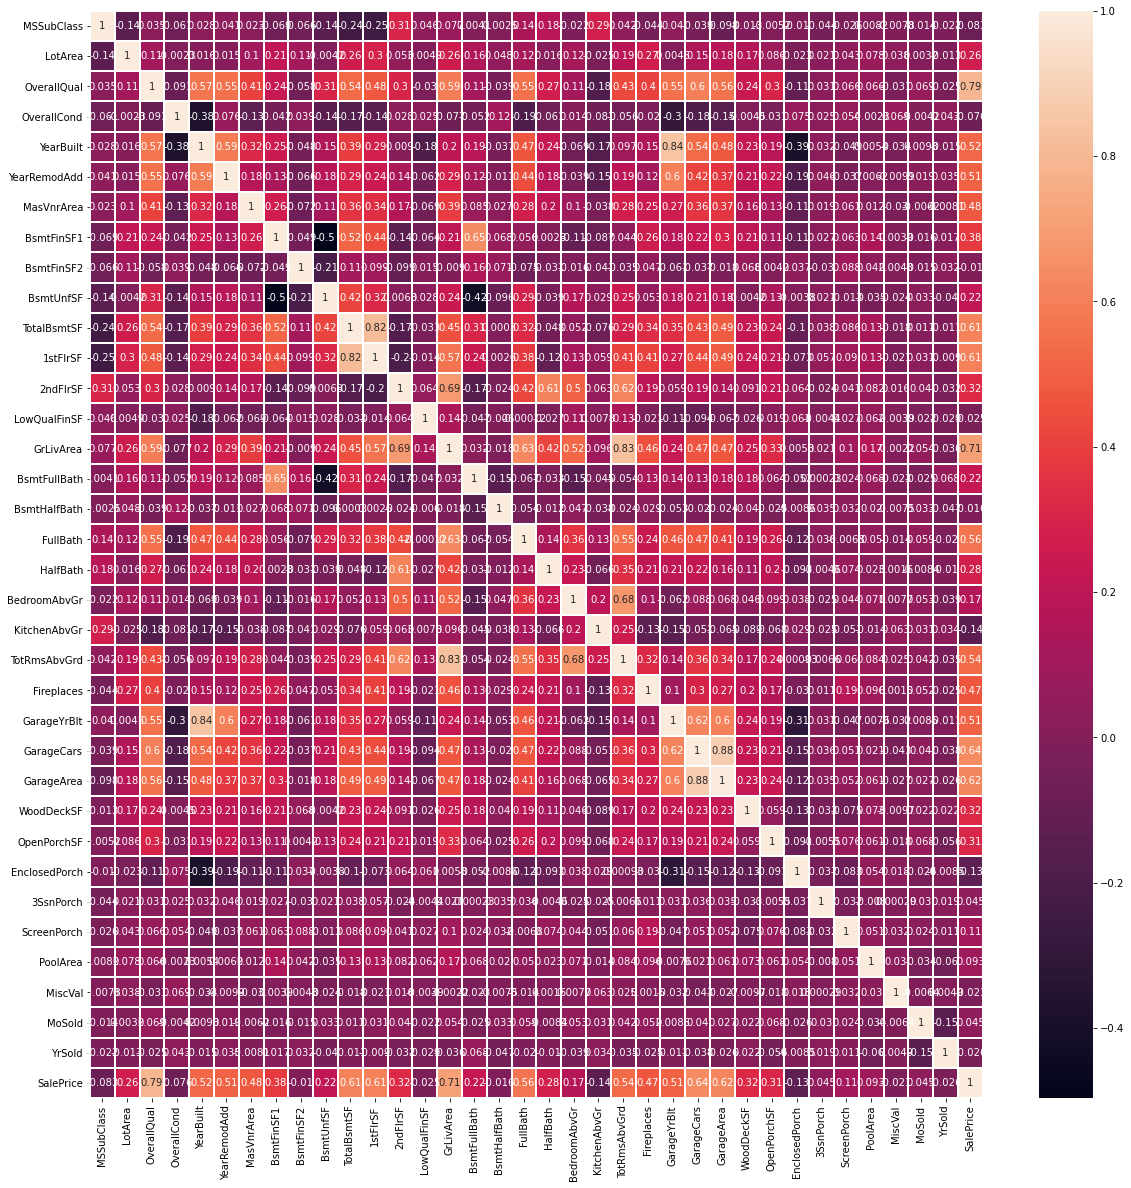

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_house, annot=True, linecolor="white", linewidths=1)
plt.show() 

- Here we can see that **'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'**
- Total of 13 variables have more than 0.4 correlation with **SalePrice**
- We will get some insight into these 13 variables

In [45]:
high_coor = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']
len(high_coor)

13

<Figure size 432x288 with 0 Axes>

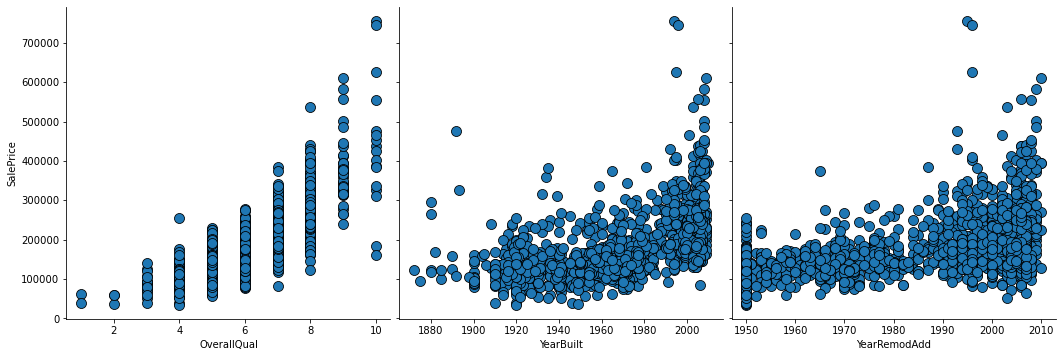

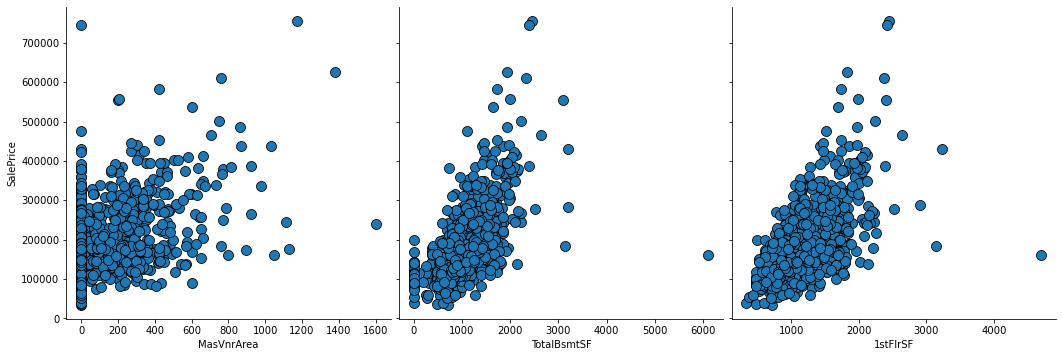

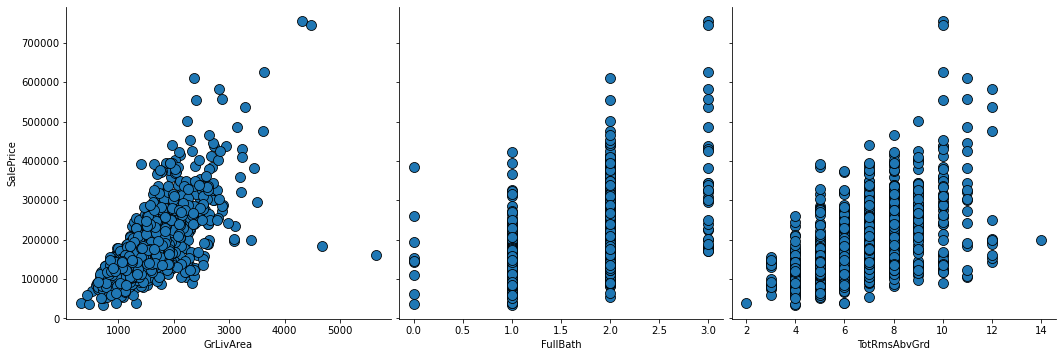

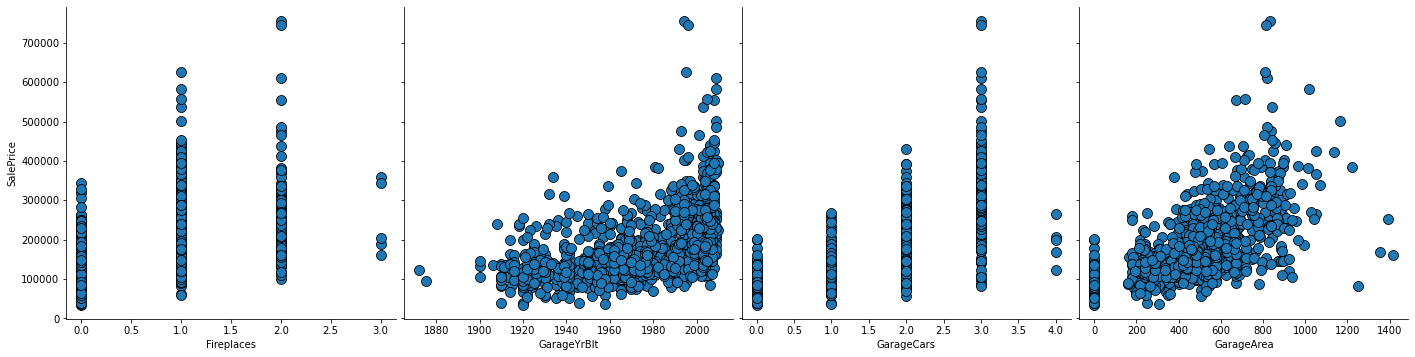

In [46]:
plt.figure(1)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[:3] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(2)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[3:6] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(3)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[6:9] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.figure(4)
ax = sns.pairplot(data = surprise_house_data, y_vars = 'SalePrice', x_vars=high_coor[9:] , diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'}, 
             height = 5)
plt.show()

- Plotting pair plot for those variables which show correlation above 60
- Here, we can see that when an increase in the OverallQual value increases the SalePrice. 
- Increase in  YearBuilt, YearRemodAdd, FullBath, TotRmsAbvGrd also increased the salePrice
- People usually prefer 'Fireplaces', 'GarageCars', 'GarageArea' in the mid than man. 

In [47]:
coor_60 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']
len(coor_60)

6

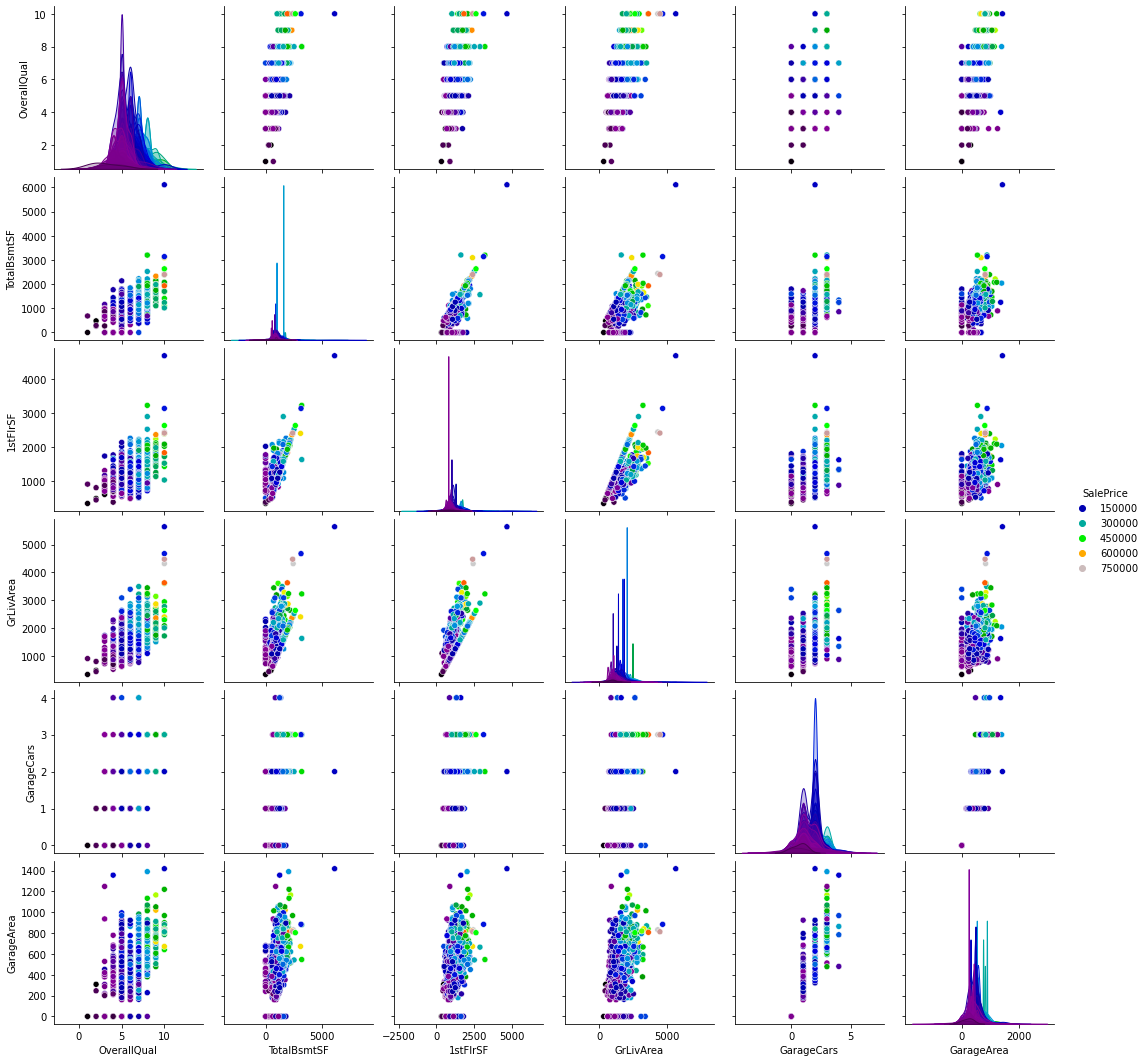

In [48]:
g = sns.pairplot(data = surprise_house_data, hue = 'SalePrice', vars=coor_60, palette="nipy_spectral")
plt.show()

## Data Preparation

In [49]:
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [50]:
for i, val in enumerate(unique_cat):
    if val <=2:
        print(unique_cat.keys()[i] , val)

Street 2
CentralAir 2
Utilities 2


In [51]:
# Street, CentralAir, Utilities have only two unique variables
surprise_house_data['Street'] = surprise_house_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
surprise_house_data['CentralAir'] = surprise_house_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)                                                 
surprise_house_data['Utilities'] = surprise_house_data['Utilities'].apply(lambda x : 1 if x == 'AllPub' else 0)


In [52]:
# Getting only the categorical variables. 
categorical = surprise_house_data.select_dtypes(include=['object'])
categorical.shape

(1451, 35)

In [53]:
# converting all the categorical variables into dummies
dummy_cat = pd.get_dummies(categorical, drop_first=True)
dummy_cat.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     1                     0   
4                     0                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     1                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0           

In [54]:
categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [55]:
# Dropping those categorical variables which are converted into dummies
surprise_house_data = surprise_house_data.drop(categorical.columns, axis=1)
surprise_house_data.shape

(1451, 39)

In [56]:
# contacting the dummies and house_data
final_house_data = pd.concat([dummy_cat, surprise_house_data], axis=1)
final_house_data.shape

(1451, 241)

In [57]:
final_house_data.sample()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
1393            0            0            0            1             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1393             0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
1393                1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
1393                 1              0              0                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1393                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
1393                     0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
1393                     0                    0                     0   

      Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
1393                     0                   0                     0   

      Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
1393                    0                     0                     0   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
1393                     1                   0                    0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
1393                     0                     0                     0   

      Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  \
1393                    0                     0                 0   

      Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
1393                1                0                0                0   

      Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
1393                0                0                0                 0   

      Condition2_Norm  ...  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
1393                1  ...               0               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
1393             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1393                     0                     0                     1   

      SaleCondition_Partial  MSSubClass  LotArea  Street  Utilities  \
1393                      0         190    10800       1          1   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
1393            6            7       1905          2000         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  \
1393           0           0        482          482           0      1221   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
1393       691             0       1912             0             0         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
1393         0             3             2             7           1   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
1393       2003.0           2         672           0           25   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1393            212          0            0         0        0       4   

      YrSold  SalePrice  
1393    2008     163000  

[1 rows x 241 columns]

In [58]:
final_house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 241 entries, MSZoning_FV to SalePrice
dtypes: float64(2), int64(37), uint8(202)
memory usage: 772.0 KB


## Splitting the Data into Training and Testing Sets

In [59]:
# importing train_test_split
from sklearn.model_selection import train_test_split

In [60]:
y = final_house_data.SalePrice
y.shape

(1451,)

In [61]:
X = final_house_data.drop("SalePrice", axis=1)
X.shape

(1451, 240)

In [62]:
np.random.seed(0)
# dividing the dataset into train and test with 70/30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [63]:
print(X_train.shape, X_test.shape)

(1015, 240) (436, 240)


### Rescalling feature of house dataframe
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 
- However, I m going to use Standardisation scal.

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
# getting the numerical variables which have dtype of 'int64','float64'
num_val = X_train.select_dtypes(include=['int64','float64']).columns
num_val

Index(['MSSubClass', 'LotArea', 'Street', 'Utilities', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [66]:
# Scaling the data
scaler = StandardScaler()
X_train[num_val] = scaler.fit_transform(X_train[num_val])
X_test[num_val] = scaler.transform(X_test[num_val])

In [67]:
X_train.describe()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
count  1015.000000  1015.000000  1015.000000   1015.00000   1015.000000   
mean      0.040394     0.008867     0.788177      0.15665      0.030542   
std       0.196979     0.093793     0.408801      0.36365      0.172158   
min       0.000000     0.000000     0.000000      0.00000      0.000000   
25%       0.000000     0.000000     1.000000      0.00000      0.000000   
50%       0.000000     0.000000     1.000000      0.00000      0.000000   
75%       0.000000     0.000000     1.000000      0.00000      0.000000   
max       1.000000     1.000000     1.000000      1.00000      1.000000   

       LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
count   1015.000000   1015.000000      1015.000000      1015.000000   
mean       0.008867      0.631527         0.030542         0.025616   
std        0.093793      0.482628         0.172158         0.158064   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.000000      0.000000         0.000000         0.000000   
50%        0.000000      1.000000         0.000000         0.000000   
75%        0.000000      1.000000         0.000000         0.000000   
max        1.000000      1.000000         1.000000         1.000000   

       LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
count      1015.000000        1015.000000    1015.000000    1015.000000   
mean          0.900493           0.062069       0.036453       0.001970   
std           0.299490           0.241400       0.187507       0.044368   
min           0.000000           0.000000       0.000000       0.000000   
25%           1.000000           0.000000       0.000000       0.000000   
50%           1.000000           0.000000       0.000000       0.000000   
75%           1.000000           0.000000       0.000000       0.000000   
max           1.000000           1.000000       1.000000       1.000000   

       LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
count       1015.000000    1015.000000    1015.000000           1015.000000   
mean           0.721182       0.041379       0.008867              0.001970   
std            0.448639       0.199264       0.093793              0.044368   
min            0.000000       0.000000       0.000000              0.000000   
25%            0.000000       0.000000       0.000000              0.000000   
50%            1.000000       0.000000       0.000000              0.000000   
75%            1.000000       0.000000       0.000000              0.000000   
max            1.000000       1.000000       1.000000              1.000000   

       Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
count          1015.000000           1015.000000           1015.000000   
mean              0.007882              0.041379              0.018719   
std               0.088472              0.199264              0.135598   
min               0.000000              0.000000              0.000000   
25%               0.000000              0.000000              0.000000   
50%               0.000000              0.000000              0.000000   
75%               0.000000              0.000000              0.000000   
max               1.000000              1.000000              1.000000   

       Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
count           1015.000000           1015.000000           1015.000000   
mean               0.097537              0.032512              0.065025   
std                0.296834              0.177444              0.246691   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000         

## Building a model using Linear, Ridge and Lasso Regression

 
### Model A: Without log and scale on y.

In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

#### Implementing RFE

In [69]:
# Building a Regression model.
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [70]:
# Calculating the RFE
rfe = RFE(lin_reg, 20)
rfe = rfe.fit(X_train, y_train)

In [71]:
# making a list of column names, support and ranking of RFE
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [72]:
# converting the list to df and sorting by rank
rfe_df = pd.DataFrame(rfe_list, columns=["name", "support", "rank"])
rfe_df.sort_values(by = "rank")[0:22]

name  support  rank
137  BsmtFinType1_NO-BA     True     1
147        Heating_GasW     True     1
146        Heating_GasA     True     1
127      BsmtCond_NO-BA     True     1
184    GarageCond_NO-GA     True     1
124      BsmtQual_NO-BA     True     1
179    GarageQual_NO-GA     True     1
150        Heating_Wall     True     1
148        Heating_Grav     True     1
211          BsmtFinSF1     True     1
212          BsmtFinSF2     True     1
149        Heating_OthW     True     1
213           BsmtUnfSF     True     1
214         TotalBsmtSF     True     1
173    GarageType_NO-GA     True     1
216            1stFlrSF     True     1
174  GarageFinish_NO-GA     True     1
217            2ndFlrSF     True     1
219           GrLivArea     True     1
218        LowQualFinSF     True     1
95   Exterior2nd_CBlock    False     2
81   Exterior1st_CBlock    False     3

In [73]:
col=X_train.columns[rfe.support_]
col

Index(['BsmtQual_NO-BA', 'BsmtCond_NO-BA', 'BsmtFinType1_NO-BA',
       'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'GarageType_NO-GA', 'GarageFinish_NO-GA',
       'GarageQual_NO-GA', 'GarageCond_NO-GA', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea'],
      dtype='object')

In [74]:
X_train_rfe=X_train[col]

### Building linear model using statsmodel, for the detailed statistics

#### Model A1: Linear Model:

In [75]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          9.28e-203
Time:                        20:52:30   Log-Likelihood:                -12393.
No. Observations:                1015   AIC:                         2.481e+04
Df Residuals:                    1002   BIC:                         2.488e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.005e+16   2.21

In [77]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [78]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
0       BsmtQual_NO-BA        inf
9   GarageFinish_NO-GA        inf
15         TotalBsmtSF        inf
14           BsmtUnfSF        inf
13          BsmtFinSF2        inf
12          BsmtFinSF1        inf
11    GarageCond_NO-GA        inf
1       BsmtCond_NO-BA        inf
10    GarageQual_NO-GA        inf
8     GarageType_NO-GA        inf
2   BsmtFinType1_NO-BA        inf
18        LowQualFinSF  210121.31
19           GrLivArea   17994.47
17            2ndFlrSF    5771.46
16            1stFlrSF    3740.97
7         Heating_Wall       1.12
3         Heating_GasA       1.08
5         Heating_Grav       1.04
6         Heating_OthW       1.03
4         Heating_GasW       1.02

- As we can see, it has high VIF values, and we can check the linear assumptions. 

In [79]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [80]:
residual = y_train - y_train_predict_linear

In [81]:
sum(residual)

-374735.97265625

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

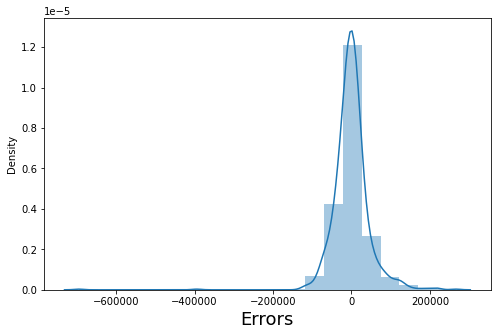

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

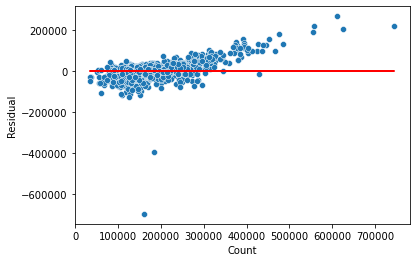

In [83]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- **linear model is violating all the Assumption** of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 
- This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**
- Hence, we have to use either **Ridge or Lasso**.

In [84]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.6233267472198964


In [85]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

Root mean_squared_error value
Train:  48574.66063054105


## Model A2: Redge Regression

In [86]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 40}
-18914.88851850744


In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.006715      0.002306         0.002146        0.000301      0.0001   
1        0.005231      0.000341         0.001978        0.000157       0.001   
2        0.005335      0.000255         0.002038        0.000313        0.01   
3        0.005478      0.000268         0.002075        0.000307        0.05   
4        0.005352      0.000512         0.001968        0.000209         0.1   
5        0.005145      0.000277         0.001952        0.000182         0.2   
6        0.005438      0.000464         0.002134        0.000274         0.3   
7        0.005333      0.000227         0.002047        0.000302         0.4   
8        0.004870      0.000230         0.001820        0.000058         0.5   
9        0.005425      0.000266         0.002076        0.000382         0.6   
10       0.005184      0.000222         0.001946        0.000298         0.7   
11       0.005116      0.000278         0.001912        0.000294         0.8   
12       0.005003      0.000150         0.002014        0.000459         0.9   
13       0.005936      0.000593         0.002328        0.000546         1.0   
14       0.005642      0.000284         0.002484        0.000482         2.0   
15       0.019948      0.033789         0.002596        0.001224         3.0   
16       0.007729      0.001092         0.002459        0.000807         4.0   
17       0.006167      0.000473         0.002501        0.000575         5.0   
18       0.006226      0.000478         0.002260        0.000544         6.0   
19       0.006083      0.000496         0.001908        0.000148         7.0   
20       0.006285      0.000440         0.002176        0.000326         8.0   
21       0.005802      0.000565         0.002053        0.000331         9.0   
22       0.005767      0.000555         0.002011        0.000399        10.0   
23       0.006239      0.000360         0.002049        0.000389          20   
24       0.006281      0.000470         0.002415        0.000513          30   
25       0.006075      0.001550         0.001937        0.000317          40   
26       0.006001      0.000827         0.001923        0.000432          50   
27       0.006039      0.000697         0.002061        0.000452          60   
28       0.006202      0.000490         0.002021        0.000421          70   
29       0.005770      0.000468         0.001922        0.000254         100   
30       0.005398      0.000402         0.001747        0.000008         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -25188.032791      -17894.611770   
1    {'alpha': 0.001}      -25185.322543      -17892.167117   
2     {'alpha': 0.01}      -25158.693449      -17960.043962   
3     {'alpha': 0.05}      -25049.309510      -18487.873787   
4      {'alpha': 0.1}      -24933.392910      -18797.266278   
5      {'alpha': 0.2}      -24742.366105      -18930.001545   
6      {'alpha': 0.3}      -24603.757480      -18872.205098   
7      {'alpha': 0.4}      -24495.849368      -18791.177598   
8      {'alpha': 0.5}      -24400.906946      -18712.005361   
9      {'alpha': 0.6}      -24316.207396      -18696.114917   
10     {'alpha': 0.7}      -24239.772037      -18680.497459   
11     {'alpha': 0.8}      -24171.487243      -18673.801424   
12     {'alpha': 0.9}      -24114.094829      -18668.365730   
13     {'alpha': 1.0}      -24079.163372      -18662.422579   
14     {'alpha': 2.0}      -23822.652137      -18536.351055   
15     {'alpha': 3.0}      -23677.819544      -18432.319080   
16     {'alpha': 4.0}      -23586.535092      -18384.184350   
17     {'alpha': 5.0}      -23513.638946      -18352.032302   
18     {'alpha': 6.0}      -23477.926187      -18322.143748   
19     {'alpha': 7.0}      -23464.740032      -18287.135308   
20     {'alpha': 8.0}      -23467.444871      -18251.585413   
21     {'alpha': 9.0}      -23469.987762      -18227.3182

In [89]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

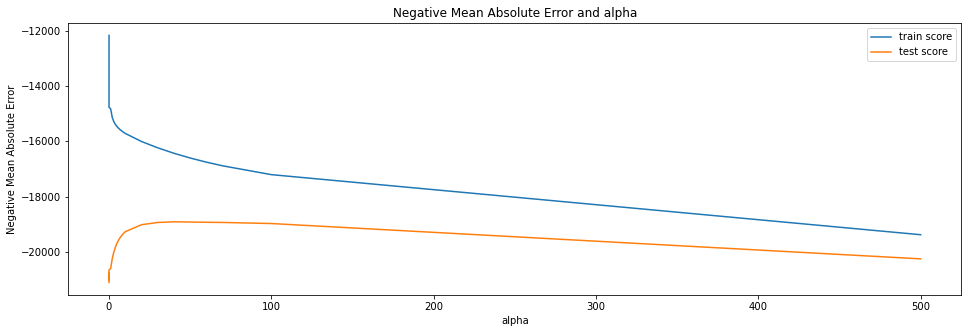

In [90]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

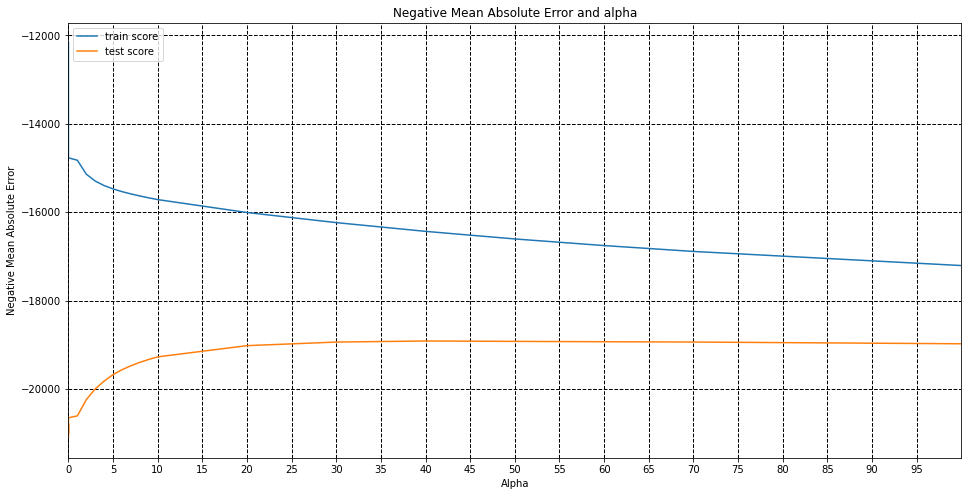

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [92]:
# final ridge model with alpha as 40
ridge = Ridge(alpha=40)
ridge.fit(X_train, y_train)

Ridge(alpha=40)

In [93]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 1.77790075e+04,  1.48090707e+04,  1.38618805e+04,  1.16626667e+04,
        1.11240630e+04,  9.36452019e+03,  9.01504034e+03,  8.92257923e+03,
        8.53293221e+03,  7.64045532e+03,  7.39104283e+03,  7.26789711e+03,
        7.09995443e+03,  6.69792391e+03,  6.39752430e+03,  6.24557557e+03,
        6.01791327e+03,  5.83139303e+03,  5.74252413e+03,  5.61638474e+03,
        5.51968625e+03,  5.43017943e+03,  5.24207472e+03,  5.21581753e+03,
        5.17397707e+03,  4.95677881e+03,  4.29232434e+03,  4.28601856e+03,
        4.03004832e+03,  4.00203907e+03,  3.91479059e+03,  3.84618794e+03,
        3.80936502e+03,  3.48610808e+03,  3.46019043e+03,  3.28830054e+03,
        3.27914125e+03,  3.09529870e+03,  3.02733177e+03,  3.01100085e+03,
        2.96265961e+03,  2.86201426e+03,  2.79953131e+03,  2.78712976e+03,
        2.70766757e+03,  2.69707827e+03,  2.56146631e+03,  2.52805670e+03,
        2.47987619e+03,  2.47239484e+03,  2.33759482e+03,  2.28338506e+03,
        2.18715946e+03,  

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

In [95]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.872313535177015
Test:  0.8632817505778795


In [96]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

Root mean_squared_error value
Train:  28281.329088034385
Test:  29422.77711794915


## Model A3: Lasso Regression

In [97]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [98]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-19113.64666325131


In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.122537      0.007876         0.001879        0.000068      0.0001   
1        0.124947      0.003881         0.001933        0.000205       0.001   
2        0.124086      0.005963         0.001992        0.000244        0.01   
3        0.128048      0.006225         0.002065        0.000189        0.05   
4        0.124626      0.008383         0.001972        0.000172         0.1   
5        0.127173      0.007154         0.001974        0.000131         0.2   
6        0.126944      0.007648         0.002277        0.000267         0.3   
7        0.126450      0.008099         0.001885        0.000122         0.4   
8        0.124365      0.008483         0.001968        0.000255         0.5   
9        0.123467      0.006645         0.002251        0.000373         0.6   
10       0.123021      0.009939         0.002176        0.000194         0.7   
11       0.119174      0.008289         0.001877        0.000111         0.8   
12       0.114940      0.013278         0.002007        0.000334         0.9   
13       0.116998      0.018587         0.002470        0.001082         1.0   
14       0.123640      0.003802         0.001826        0.000172         2.0   
15       0.116673      0.007852         0.001707        0.000041         3.0   
16       0.119387      0.005145         0.001923        0.000374         4.0   
17       0.122711      0.004621         0.001886        0.000462         5.0   
18       0.123645      0.005116         0.001958        0.000464         6.0   
19       0.115139      0.025279         0.001701        0.000022         7.0   
20       0.103644      0.021337         0.001841        0.000342         8.0   
21       0.090403      0.025698         0.001712        0.000088         9.0   
22       0.090981      0.027549         0.001991        0.000702        10.0   
23       0.075619      0.025528         0.001694        0.000027          20   
24       0.092785      0.029333         0.001904        0.000394          30   
25       0.096464      0.037272         0.002032        0.000034          40   
26       0.086872      0.036602         0.002220        0.001099          50   
27       0.098330      0.014151         0.002019        0.000187          60   
28       0.066486      0.003682         0.001743        0.000061          70   
29       0.044157      0.002647         0.001804        0.000222         100   
30       0.009760      0.001459         0.001676        0.000018         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}      -25145.104925      -17883.126309   
1    {'alpha': 0.001}      -25143.724121      -17882.883170   
2     {'alpha': 0.01}      -25136.231672      -17880.458384   
3     {'alpha': 0.05}      -25130.068621      -17869.982631   
4      {'alpha': 0.1}      -25121.083573      -17857.649793   
5      {'alpha': 0.2}      -25108.947896      -17833.824665   
6      {'alpha': 0.3}      -25102.347297      -17810.652989   
7      {'alpha': 0.4}      -25095.484226      -17787.349679   
8      {'alpha': 0.5}      -25088.860802      -17763.669508   
9      {'alpha': 0.6}      -25082.251152      -17737.836638   
10     {'alpha': 0.7}      -25077.894757      -17712.707882   
11     {'alpha': 0.8}      -25073.495727      -17688.385635   
12     {'alpha': 0.9}      -25069.042620      -17663.298282   
13     {'alpha': 1.0}      -25063.165433      -17639.100824   
14     {'alpha': 2.0}      -24985.400894      -17501.499395   
15     {'alpha': 3.0}      -24913.585341      -17433.428058   
16     {'alpha': 4.0}      -24837.479282      -17404.470555   
17     {'alpha': 5.0}      -24791.416106      -17400.238078   
18     {'alpha': 6.0}      -24745.297952      -17399.874249   
19     {'alpha': 7.0}      -24683.503479      -17377.014795   
20     {'alpha': 8.0}      -24612.736191      -17365.042188   
21     {'alpha': 9.0}      -24538.577579      -17369.0242

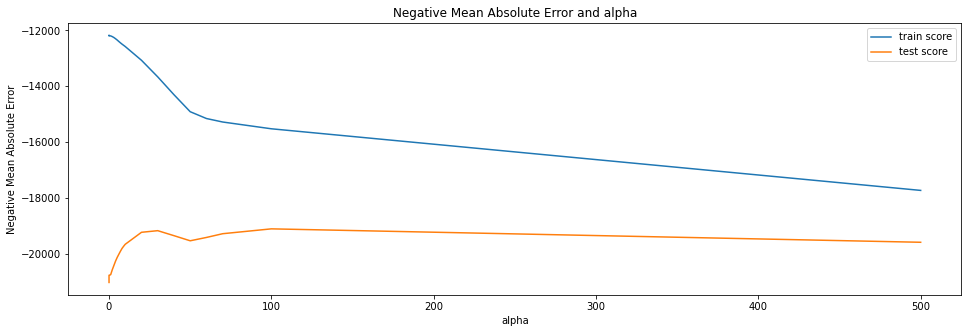

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

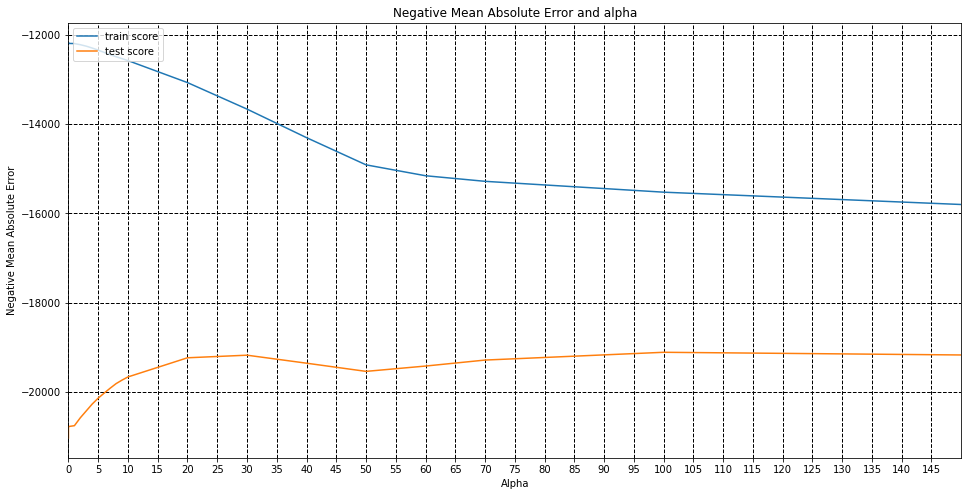

In [101]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 150)
plt.xticks(np.arange(0, 150, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [102]:
#final lasso model
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [103]:
np.array(sorted(lasso.coef_, reverse=True))

array([ 3.71665970e+04,  3.60425010e+04,  3.02515342e+04,  2.62344276e+04,
        2.45843970e+04,  2.07839695e+04,  1.82719274e+04,  1.75112526e+04,
        1.74184930e+04,  1.54021694e+04,  1.39163598e+04,  1.26904158e+04,
        1.20013671e+04,  1.14196446e+04,  1.11220627e+04,  1.00736497e+04,
        9.68616311e+03,  9.59796759e+03,  8.30544639e+03,  7.27203473e+03,
        7.23545446e+03,  6.54753407e+03,  6.29754041e+03,  6.00611369e+03,
        5.89469613e+03,  5.75424911e+03,  5.21335280e+03,  5.08765255e+03,
        4.27858960e+03,  3.98335435e+03,  3.67902559e+03,  3.57587978e+03,
        3.51393828e+03,  3.42105555e+03,  3.01880482e+03,  2.98358920e+03,
        2.84298125e+03,  2.80562112e+03,  2.61184848e+03,  2.11560126e+03,
        2.08665694e+03,  2.06548062e+03,  1.94026006e+03,  1.92750070e+03,
        1.90869648e+03,  1.90648741e+03,  1.70214909e+03,  1.67735677e+03,
        1.25188660e+03,  1.24838218e+03,  1.17037345e+03,  1.03471209e+03,
        1.03159186e+03,  

In [104]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.8987189712154844
Test:  0.8666593320915114


In [105]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  25187.869579934435
Test:  29057.064041235597


In [106]:
residual = y_train - y_train_pred_lasso

In [107]:
sum(residual)

-8.454662747681141e-09

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

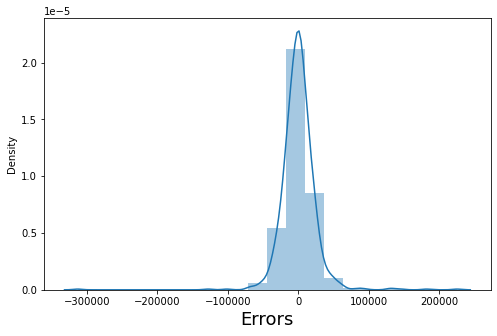

In [108]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (8,5))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Error are independent of each other:

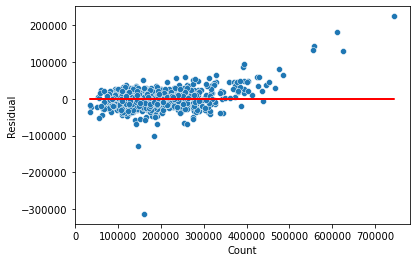

In [109]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that Lasso model is **not violating** all the Assumption of Linear Regression:
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or **Residual is almost 0.**
- Error terms should have equal variance 
- Assumption still has some outliers, and this is because **SalePrice** columns, which have lots of outliers as we saw in EDA
- We will try to reduce it using **log on SalePrice** to reduce it as it shows the **right skewness** in the distplot.

## Ridge VS Lasso
### For Ridge:
**Alpha: 40**

**R-squared value for Ridge**
- Train:  0.872
- Test:  0.863

**mean_squared_error value**
- Train:  28281.329
- Test:  29422.777
******
### For Lasso:
**Alpha: 100**

**R-squared value**
- Train:  0.899
- Test:  0.867

**mean_squared_error value**
- Train:  25187.870
- Test:  29057.064

In [110]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [111]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col     ridge_cof  Abs_ridge_cof      lasso_cof  \
51        Condition2_PosN  -7124.485760    7124.485760 -220826.080569   
77       RoofMatl_WdShngl   4286.018558    4286.018558   37166.596980   
30   Neighborhood_NoRidge  13861.880511   13861.880511   36042.500973   
31   Neighborhood_NridgHt  14809.070668   14809.070668   30251.534186   
37   Neighborhood_StoneBr   8532.932210    8532.932210   26234.427622   
..                    ...           ...            ...            ...   
97    Exterior2nd_HdBoard  -1459.428951    1459.428951      -0.000000   
99    Exterior2nd_MetalSd    245.997976     245.997976       0.000000   
100     Exterior2nd_Other    265.110042     265.110042      -0.000000   
101   Exterior2nd_Plywood  -1191.880929    1191.880929       0.000000   
120      Foundation_Stone     69.427803      69.427803       0.000000   

     Abs_lasso_cof  
51   220826.080569  
77    37166.596980  
30    36042.500973  
31    30251.534186  
37    26234.427622  
..             ...  
97        0.000000  
99        0.000000  
100       0.000000  
101       0.000000  
120       0.000000  

[240 rows x 5 columns]

In [112]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col      lasso_cof  Abs_lasso_cof
51        Condition2_PosN -220826.080569  220826.080569
77       RoofMatl_WdShngl   37166.596980   37166.596980
30   Neighborhood_NoRidge   36042.500973   36042.500973
31   Neighborhood_NridgHt   30251.534186   30251.534186
37   Neighborhood_StoneBr   26234.427622   26234.427622
219             GrLivArea   24584.396957   24584.396957
5            LotShape_IR3  -23629.697541   23629.697541
71       RoofMatl_CompShg   20783.969497   20783.969497
123           BsmtQual_Gd  -18834.583930   18834.583930
98    Exterior2nd_ImStucc   18271.927423   18271.927423
160        KitchenQual_Gd  -18218.754728   18218.754728
161        KitchenQual_TA  -18174.819527   18174.819527
130       BsmtExposure_Gd   17511.252630   17511.252630
21   Neighborhood_Crawfor   17418.493000   17418.493000
206           OverallQual   15402.169438   15402.169438

In [113]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col     ridge_cof  Abs_ridge_cof
206           OverallQual  17779.007477   17779.007477
31   Neighborhood_NridgHt  14809.070668   14809.070668
30   Neighborhood_NoRidge  13861.880511   13861.880511
123           BsmtQual_Gd -12945.130206   12945.130206
219             GrLivArea  11662.666690   11662.666690
229            GarageCars  11124.063016   11124.063016
22   Neighborhood_Edwards -10444.019134   10444.019134
160        KitchenQual_Gd -10278.271619   10278.271619
161        KitchenQual_TA  -9702.053260    9702.053260
41        Condition1_Norm   9364.520189    9364.520189
130       BsmtExposure_Gd   9015.040337    9015.040337
217              2ndFlrSF   8922.579231    8922.579231
37   Neighborhood_StoneBr   8532.932210    8532.932210
125           BsmtQual_TA  -7764.426348    7764.426348
21   Neighborhood_Crawfor   7640.455325    7640.455325

## Model B: Log on SalePrice

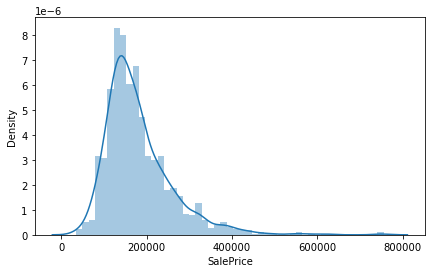

In [114]:
# orginal SalePrice without log
plt.figure(figsize=(7,4))
sns.distplot(surprise_house_data.SalePrice)
plt.show()

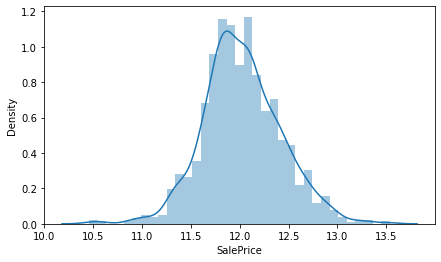

In [115]:
# SalePrice with log
plt.figure(figsize=(7,4))
sns.distplot(np.log(surprise_house_data.SalePrice))
plt.show()

In [116]:
y_train = np.log(y_train)
y_test = np.log(y_test)

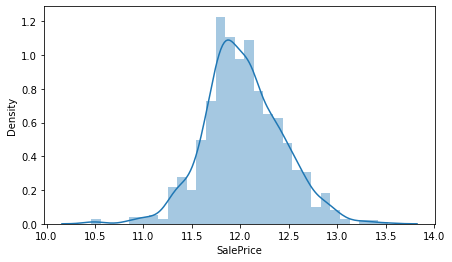

In [117]:
plt.figure(figsize=(7,4))
sns.distplot(y_train)
plt.show()

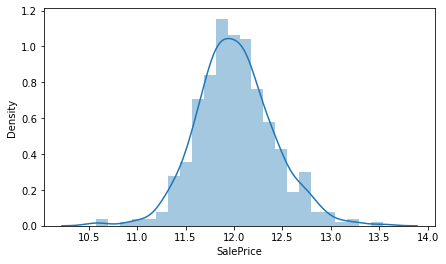

In [118]:
plt.figure(figsize=(7,4))
sns.distplot(y_test)
plt.show()

## Model B1 (linear model)

In [119]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          9.33e-206
Time:                        20:52:58   Log-Likelihood:                -8.3682
No. Observations:                1015   AIC:                             42.74
Df Residuals:                    1002   BIC:                             106.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.411e+11   1.11

In [120]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [121]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
0       BsmtQual_NO-BA        inf
9   GarageFinish_NO-GA        inf
15         TotalBsmtSF        inf
14           BsmtUnfSF        inf
13          BsmtFinSF2        inf
12          BsmtFinSF1        inf
11    GarageCond_NO-GA        inf
1       BsmtCond_NO-BA        inf
10    GarageQual_NO-GA        inf
8     GarageType_NO-GA        inf
2   BsmtFinType1_NO-BA        inf
18        LowQualFinSF  210121.31
19           GrLivArea   17994.47
17            2ndFlrSF    5771.46
16            1stFlrSF    3740.97
7         Heating_Wall       1.12
3         Heating_GasA       1.08
5         Heating_Grav       1.04
6         Heating_OthW       1.03
4         Heating_GasW       1.02

In [122]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [123]:
residual = y_train - y_train_predict_linear

In [124]:
sum(residual)

-9.342765690544864

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

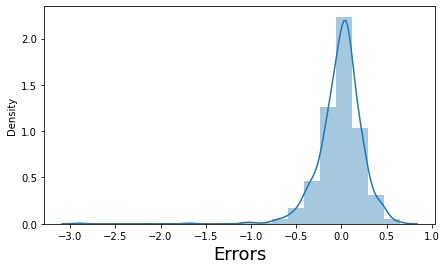

In [125]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

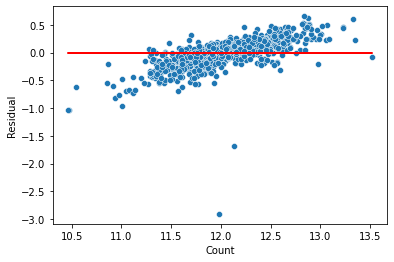

In [126]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this **linear model is violating all the Assumption** of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance
- This indicates ***non linearity** is present, and also it shows **high VIF(multicollinearity)**
- Hence, we have to use either **Ridge or Lasso**.

In [127]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.628510919190217


In [128]:
# Root mean_squared_error value for train and test for Linear model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_predict_linear) ** 0.5)

Root mean_squared_error value
Train:  0.2439738970374143


## Model B2: Redge Regression

In [129]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [130]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.09288705406031705


In [131]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.005843      0.000884         0.002039        0.000248      0.0001   
1        0.005088      0.000238         0.001852        0.000262       0.001   
2        0.005130      0.000327         0.002059        0.000400        0.01   
3        0.005455      0.000161         0.002156        0.000406        0.05   
4        0.006869      0.001807         0.002297        0.000265         0.1   
5        0.015178      0.016420         0.003736        0.002228         0.2   
6        0.014798      0.010347         0.002539        0.000200         0.3   
7        0.005656      0.000575         0.002036        0.000080         0.4   
8        0.005597      0.000315         0.002016        0.000027         0.5   
9        0.006133      0.000580         0.002228        0.000300         0.6   
10       0.005884      0.000553         0.002171        0.000553         0.7   
11       0.005031      0.000274         0.001926        0.000278         0.8   
12       0.005494      0.000511         0.002324        0.001033         0.9   
13       0.005148      0.000525         0.002047        0.000394         1.0   
14       0.005362      0.000411         0.001992        0.000292         2.0   
15       0.005241      0.000522         0.002189        0.001138         3.0   
16       0.005003      0.000182         0.002029        0.000444         4.0   
17       0.005526      0.000408         0.002095        0.000330         5.0   
18       0.005145      0.000431         0.002033        0.000353         6.0   
19       0.005267      0.000391         0.002020        0.000292         7.0   
20       0.005161      0.000187         0.002051        0.000262         8.0   
21       0.005218      0.000307         0.002006        0.000272         9.0   
22       0.005341      0.000387         0.002000        0.000421        10.0   
23       0.005070      0.000277         0.002084        0.000428          20   
24       0.005776      0.001143         0.001912        0.000327          30   
25       0.005095      0.000219         0.001903        0.000291          40   
26       0.005053      0.000302         0.001931        0.000250          50   
27       0.005397      0.000489         0.002052        0.000398          60   
28       0.005075      0.000244         0.002165        0.000424          70   
29       0.005205      0.000168         0.002147        0.000337         100   
30       0.005340      0.000543         0.001769        0.000119         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.117486          -0.085999   
1    {'alpha': 0.001}          -0.117472          -0.086178   
2     {'alpha': 0.01}          -0.117327          -0.087708   
3     {'alpha': 0.05}          -0.116655          -0.092778   
4      {'alpha': 0.1}          -0.115998          -0.095792   
5      {'alpha': 0.2}          -0.115051          -0.097956   
6      {'alpha': 0.3}          -0.114300          -0.098629   
7      {'alpha': 0.4}          -0.113640          -0.098802   
8      {'alpha': 0.5}          -0.113204          -0.098761   
9      {'alpha': 0.6}          -0.112814          -0.098618   
10     {'alpha': 0.7}          -0.112459          -0.098455   
11     {'alpha': 0.8}          -0.112190          -0.098302   
12     {'alpha': 0.9}          -0.111981          -0.098131   
13     {'alpha': 1.0}          -0.111777          -0.097952   
14     {'alpha': 2.0}          -0.110162          -0.096334   
15     {'alpha': 3.0}          -0.109281          -0.095589   
16     {'alpha': 4.0}          -0.108574          -0.095113   
17     {'alpha': 5.0}          -0.108027          -0.094757   
18     {'alpha': 6.0}          -0.107573          -0.094473   
19     {'alpha': 7.0}          -0.107174          -0.094241   
20     {'alpha': 8.0}          -0.106828          -0.094168   
21     {'alpha': 9.0}          -0.106558          -0.0941

In [132]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

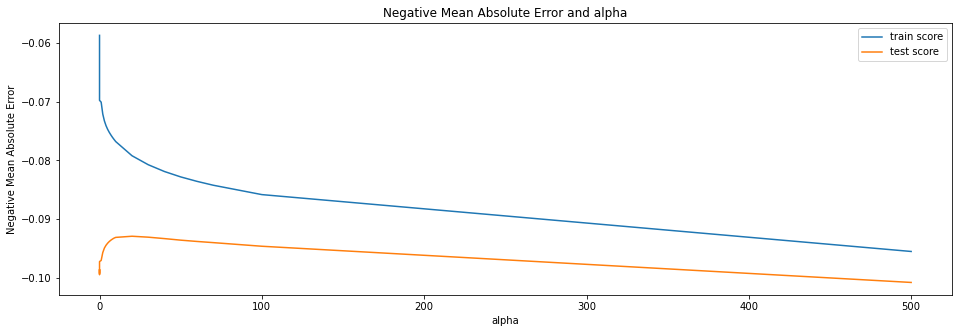

In [133]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

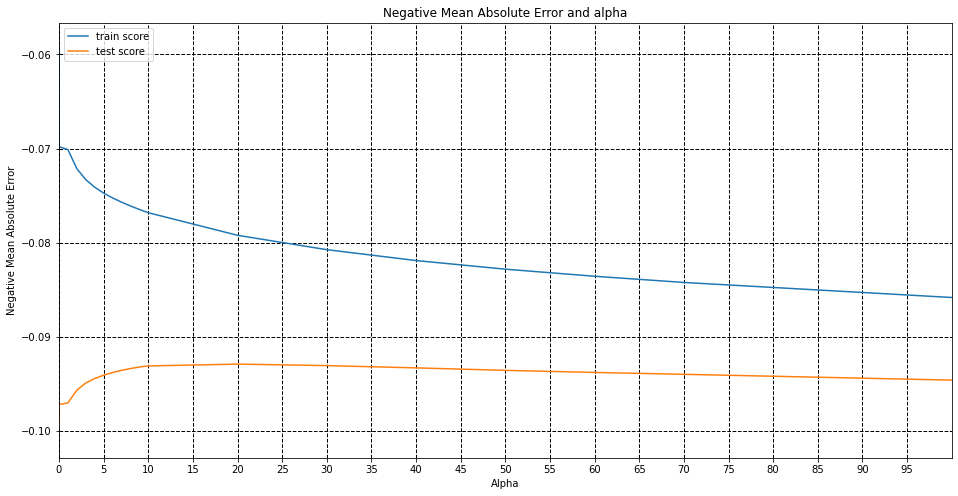

In [134]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [135]:
# final ridge model with alpha as 20 but without log we get alpha as 40
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [136]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 8.77283820e-02,  7.25612560e-02,  6.85380518e-02,  5.69859739e-02,
        5.69159941e-02,  5.42064613e-02,  5.25530830e-02,  5.18947546e-02,
        4.96932120e-02,  4.71319673e-02,  4.56275365e-02,  4.46367109e-02,
        4.31672987e-02,  4.07788204e-02,  3.95374566e-02,  3.82640465e-02,
        3.70716235e-02,  3.70667448e-02,  3.63039323e-02,  3.54676038e-02,
        3.48973062e-02,  3.24752386e-02,  3.19099512e-02,  3.10714406e-02,
        2.96582156e-02,  2.96378613e-02,  2.95507884e-02,  2.95212193e-02,
        2.82384391e-02,  2.80048762e-02,  2.76351151e-02,  2.69848324e-02,
        2.66237408e-02,  2.63936218e-02,  2.53218115e-02,  2.49086580e-02,
        2.32897485e-02,  2.11904629e-02,  2.08202192e-02,  2.07442209e-02,
        2.05058353e-02,  2.02139562e-02,  1.84793508e-02,  1.84238561e-02,
        1.83783434e-02,  1.83547317e-02,  1.82421176e-02,  1.79861687e-02,
        1.76356630e-02,  1.75042899e-02,  1.71715682e-02,  1.70328199e-02,
        1.66870289e-02,  

In [137]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.9106854222291275
Test:  0.8942911763399892


In [138]:
# Root mean_squared_error value for train and test
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

Root mean_squared_error value
Train:  0.11962763350162967
Test:  0.12907849237646563


In [139]:
residual = y_train - y_train_pred_ridge

In [140]:
sum(residual)

-4.973799150320701e-14

## Model B3: Lasso Regression

In [141]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 37 candidates, totalling 259 fits


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [142]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.09184575107474693


In [143]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.121143      0.011030         0.002028        0.000201     0.00001   
1        0.051777      0.014724         0.002034        0.000116     0.00008   
2        0.048614      0.014624         0.002043        0.000518     0.00009   
3        0.061844      0.026634         0.001849        0.000219      0.0001   
4        0.076296      0.025622         0.001957        0.000472      0.0002   
5        0.069818      0.005128         0.001716        0.000021      0.0003   
6        0.017475      0.001944         0.001704        0.000084       0.001   
7        0.005497      0.000040         0.001924        0.000461        0.01   
8        0.004431      0.000309         0.002146        0.001187        0.05   
9        0.004107      0.000114         0.001671        0.000010         0.1   
10       0.003831      0.000070         0.001840        0.000260         0.2   
11       0.003618      0.000146         0.001718        0.000078         0.3   
12       0.003520      0.000055         0.001918        0.000594         0.4   
13       0.003501      0.000069         0.001841        0.000407         0.5   
14       0.003662      0.000440         0.001834        0.000386         0.6   
15       0.003561      0.000140         0.001713        0.000069         0.7   
16       0.003471      0.000022         0.001681        0.000012         0.8   
17       0.003470      0.000028         0.001677        0.000017         0.9   
18       0.003544      0.000250         0.001664        0.000006         1.0   
19       0.003494      0.000051         0.001678        0.000015         2.0   
20       0.003459      0.000029         0.001663        0.000011         3.0   
21       0.003931      0.001143         0.001993        0.000765         4.0   
22       0.003667      0.000500         0.001671        0.000010         5.0   
23       0.003518      0.000097         0.001893        0.000465         6.0   
24       0.003716      0.000474         0.001685        0.000015         7.0   
25       0.003478      0.000031         0.001672        0.000015         8.0   
26       0.003754      0.000292         0.001743        0.000123         9.0   
27       0.003552      0.000137         0.001884        0.000444        10.0   
28       0.003896      0.000979         0.001695        0.000047          20   
29       0.003486      0.000047         0.001931        0.000485          30   
30       0.003465      0.000028         0.001676        0.000011          40   
31       0.003468      0.000016         0.001671        0.000017          50   
32       0.003490      0.000045         0.001785        0.000268          60   
33       0.003480      0.000041         0.001674        0.000015          70   
34       0.003478      0.000041         0.001675        0.000012         100   
35       0.003639      0.000375         0.002525        0.001342         500   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.116624          -0.085707   
1    {'alpha': 8e-05}          -0.111744          -0.084621   
2    {'alpha': 9e-05}          -0.111071          -0.085229   
3   {'alpha': 0.0001}          -0.110425          -0.085965   
4   {'alpha': 0.0002}          -0.107939          -0.091945   
5   {'alpha': 0.0003}          -0.107441          -0.092792   
6    {'alpha': 0.001}          -0.106332          -0.093231   
7     {'alpha': 0.01}          -0.118788          -0.100344   
8     {'alpha': 0.05}          -0.146031          -0.118437   
9      {'alpha': 0.1}          -0.185692          -0.154878   
10     {'alpha': 0.2}          -0.256098          -0.221141   
11     {'alpha': 0.3}          -0.317902          -0.284286   
12     {'alpha': 0.4}          -0.333250          -0.301579   
13     {'alpha': 0.5}          -0.333250          -0.301579   
14     {'alpha': 0.6}          -0.333250          -0.301579   
15     {'alpha': 0.7}          -0.3

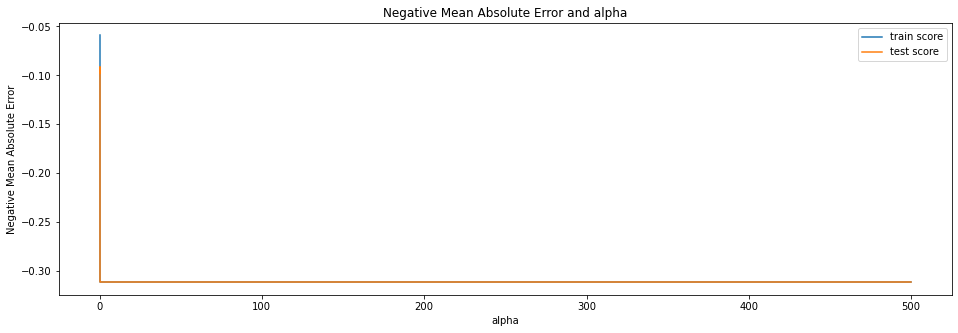

In [144]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

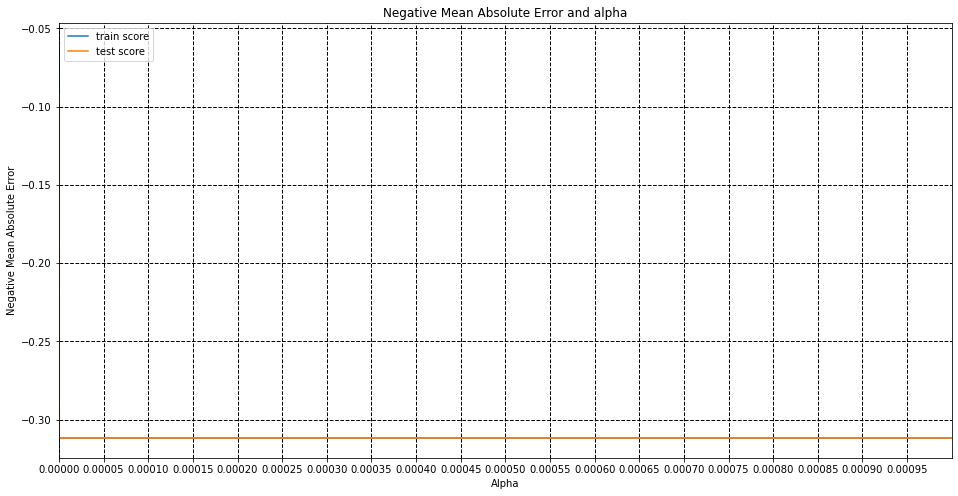

In [145]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [146]:
#final lasso model
alpha = 0.0001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [147]:
np.array(sorted(lasso.coef_, reverse=True))

array([ 1.34375992e+00,  1.29002780e+00,  1.22717253e+00,  1.21484524e+00,
        1.20224952e+00,  1.19666118e+00,  4.51120456e-01,  4.38944235e-01,
        4.24507128e-01,  3.65464827e-01,  1.57151945e-01,  1.34473218e-01,
        1.31332668e-01,  1.20090840e-01,  1.11695834e-01,  1.06971344e-01,
        1.05145055e-01,  1.03294625e-01,  9.22441593e-02,  8.98676402e-02,
        8.83398909e-02,  8.62215578e-02,  8.51024537e-02,  8.49778588e-02,
        8.18514491e-02,  7.90541972e-02,  7.38478283e-02,  7.22478459e-02,
        7.19754432e-02,  6.75497911e-02,  6.66723285e-02,  5.93180259e-02,
        5.88012396e-02,  5.53132802e-02,  5.31897801e-02,  5.17533146e-02,
        4.68997144e-02,  4.68205398e-02,  4.62236835e-02,  4.53050455e-02,
        4.38274140e-02,  4.10904391e-02,  4.10670726e-02,  4.07992996e-02,
        3.97001667e-02,  3.96282327e-02,  3.88541229e-02,  3.77334236e-02,
        3.58453906e-02,  3.47558780e-02,  3.44877378e-02,  3.44648324e-02,
        3.41260069e-02,  

In [148]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.9480116334768429
Test:  0.8440370268831052


In [149]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.09126902746213653
Test:  0.15678662697380752


In [150]:
residual = y_train - y_train_pred_lasso

In [151]:
sum(residual)

-1.127986593019159e-12

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

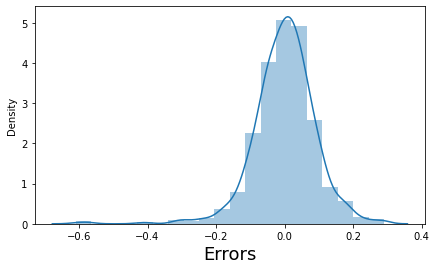

In [152]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

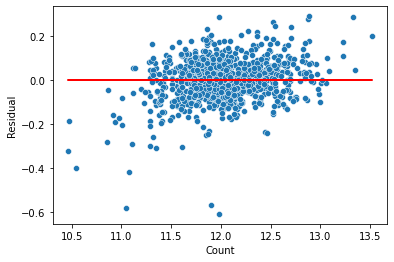

In [153]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this Lasso model is not volilating all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0
- Error terms should have equal variance 

## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.910
- Test:  0.894

**mean_squared_error value**
- Train:  0.120
- Test:  0.129

******
### For Lasso:
**Alpha: 0.0001**

**R-squared value**
- Train:  0.948
- Test:  0.844

**mean_squared_error value**
- Train:  0.0913
- Test:   0.157


In [154]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [155]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col  ridge_cof  Abs_ridge_cof  lasso_cof  Abs_lasso_cof
77      RoofMatl_WdShngl   0.020214       0.020214   1.343760       1.343760
51       Condition2_PosN  -0.051373       0.051373  -1.329836       1.329836
71      RoofMatl_CompShg   0.029521       0.029521   1.290028       1.290028
73        RoofMatl_Metal   0.004240       0.004240   1.227173       1.227173
75      RoofMatl_Tar&Grv   0.003780       0.003780   1.214845       1.214845
..                   ...        ...            ...        ...            ...
94   Exterior2nd_BrkFace   0.013735       0.013735   0.000000       0.000000
93   Exterior2nd_Brk Cmn  -0.013383       0.013383  -0.000000       0.000000
92   Exterior2nd_AsphShn   0.001941       0.001941  -0.000000       0.000000
156     Electrical_FuseP  -0.000145       0.000145  -0.000000       0.000000
120     Foundation_Stone   0.004246       0.004246   0.000000       0.000000

[240 rows x 5 columns]

### Getting Ridge coefs:

In [156]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col  ridge_cof  Abs_ridge_cof
206           OverallQual   0.087728       0.087728
31   Neighborhood_NridgHt   0.072561       0.072561
21   Neighborhood_Crawfor   0.068538       0.068538
219             GrLivArea   0.056986       0.056986
200  SaleCondition_Normal   0.056916       0.056916
37   Neighborhood_StoneBr   0.054206       0.054206
80    Exterior1st_BrkFace   0.052553       0.052553
229            GarageCars   0.051895       0.051895
24    Neighborhood_IDOTRR  -0.051815       0.051815
22   Neighborhood_Edwards  -0.051568       0.051568
51        Condition2_PosN  -0.051373       0.051373
41        Condition1_Norm   0.049693       0.049693
49        Condition2_Norm   0.047132       0.047132
207           OverallCond   0.045628       0.045628
167        Functional_Typ   0.044637       0.044637

### Top Ten Ridge coefficient are:

In [157]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

col  ridge_cof
0           OverallQual   0.087728
1  Neighborhood_NridgHt   0.072561
2  Neighborhood_Crawfor   0.068538
3             GrLivArea   0.056986
4  SaleCondition_Normal   0.056916
5  Neighborhood_StoneBr   0.054206
6   Exterior1st_BrkFace   0.052553
7            GarageCars   0.051895
8   Neighborhood_IDOTRR  -0.051815
9  Neighborhood_Edwards  -0.051568

### Getting Lasso coefs:

In [158]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
77   RoofMatl_WdShngl   1.343760       1.343760
51    Condition2_PosN  -1.329836       1.329836
71   RoofMatl_CompShg   1.290028       1.290028
73     RoofMatl_Metal   1.227173       1.227173
75   RoofMatl_Tar&Grv   1.214845       1.214845
74      RoofMatl_Roll   1.202250       1.202250
76   RoofMatl_WdShake   1.196661       1.196661
1         MSZoning_RH   0.451120       0.451120
0         MSZoning_FV   0.438944       0.438944
2         MSZoning_RL   0.424507       0.424507
3         MSZoning_RM   0.365465       0.365465
162   Functional_Maj2  -0.186704       0.186704
148      Heating_Grav  -0.179794       0.179794
195      SaleType_Oth   0.157152       0.157152
70     RoofStyle_Shed   0.134473       0.134473

### Top Ten Lasso coefficient are:

In [159]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

col  lasso_cof
0  RoofMatl_WdShngl   1.343760
1   Condition2_PosN  -1.329836
2  RoofMatl_CompShg   1.290028
3    RoofMatl_Metal   1.227173
4  RoofMatl_Tar&Grv   1.214845
5     RoofMatl_Roll   1.202250
6  RoofMatl_WdShake   1.196661
7       MSZoning_RH   0.451120
8       MSZoning_FV   0.438944
9       MSZoning_RL   0.424507

## Model C: Log on SalePrice with StandardScaler()

In [160]:
# reshaping the y_train to the matrix of (-1,1)
y_train = np.array(y_train)
y_train = y_train.reshape(-1, 1)
y_train.shape

(1015, 1)

In [161]:
# Scaling the data for y_train
scaler1 = StandardScaler()
y_train = scaler1.fit_transform(y_train)

In [162]:
y_train1 = pd.DataFrame(y_train)
y_train1.describe()

0
count  1.015000e+03
mean  -1.371419e-15
std    1.000493e+00
min   -3.913941e+00
25%   -6.286707e-01
50%   -6.353531e-02
75%    6.293512e-01
max    3.732836e+00

In [163]:
# reshaping the y_train to the matrix of (-1) or to its original shape
y_train = y_train.reshape(-1)
y_train.shape

(1015,)

In [164]:
# reshaping the y_test to the matrix of (-1,1)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test.shape

(436, 1)

In [165]:
# Scaling the data for y_test
y_test = scaler1.transform(y_test)

In [166]:
y_test1 = pd.DataFrame(y_test)
y_test1.describe()

0
count  436.000000
mean    -0.037826
std      0.992948
min     -3.617309
25%     -0.650387
50%     -0.109943
75%      0.539486
max      3.766146

In [167]:
# reshaping the y_test to the matrix of (-1) or to its original shape
y_test = y_test.reshape(-1)
y_test.shape

(436,)

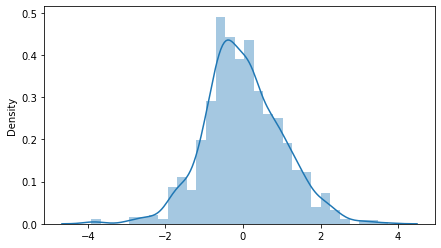

In [168]:
# checking the distribution plot for y_train
plt.figure(figsize=(7,4))
sns.distplot(y_train)
plt.show()

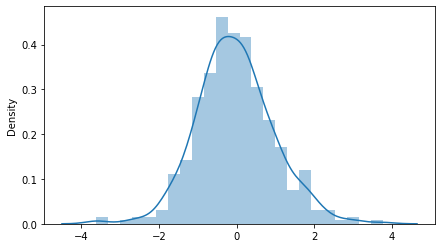

In [169]:
# checking the distribution plot for y_test
plt.figure(figsize=(7,4))
sns.distplot(y_test)
plt.show()

## Model C1 (linear model)

In [170]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# fitting y_train and X_train_rfe to api 
model = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          1.35e-211
Time:                        20:53:07   Log-Likelihood:                -923.98
No. Observations:                1015   AIC:                             1874.
Df Residuals:                    1002   BIC:                             1938.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.525e+11   2.73

In [171]:
# Removing const from X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [172]:
# Printing VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
0       BsmtQual_NO-BA        inf
9   GarageFinish_NO-GA        inf
15         TotalBsmtSF        inf
14           BsmtUnfSF        inf
13          BsmtFinSF2        inf
12          BsmtFinSF1        inf
11    GarageCond_NO-GA        inf
1       BsmtCond_NO-BA        inf
10    GarageQual_NO-GA        inf
8     GarageType_NO-GA        inf
2   BsmtFinType1_NO-BA        inf
18        LowQualFinSF  210121.31
19           GrLivArea   17994.47
17            2ndFlrSF    5771.46
16            1stFlrSF    3740.97
7         Heating_Wall       1.12
3         Heating_GasA       1.08
5         Heating_Grav       1.04
6         Heating_OthW       1.03
4         Heating_GasW       1.02

In [173]:
# Adding a constant variable to X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)
# Predicting the X_train_rfe data to get y_train_predict
y_train_predict_linear = model.predict(X_train_rfe)

In [174]:
residual = y_train - y_train_predict_linear

In [175]:
sum(residual)

1.3944388627992168

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

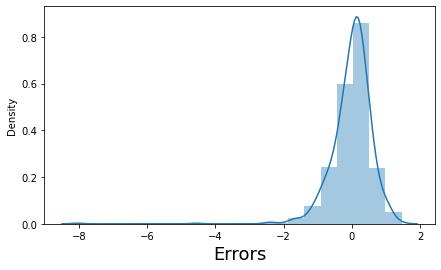

In [176]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

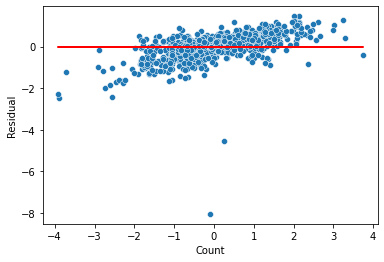

In [177]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this linear model is volilating all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed 
- Error terms should have equal variance 
- This indicates non linearitry is present and also it shows high VIF(multicolinearity) 
- We have to use either Ridge or Lasso

In [178]:
# R-squared value for train and test
print("R-squared value")
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_predict_linear))

R-squared value
Train:  0.6384046650321608


## Model C2: Redge Regression

In [179]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}

ridge = Ridge()
# Cross Validation
folds = 7
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 7 folds for each of 32 candidates, totalling 224 fits


GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [180]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.2320517524439594


In [181]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.006341      0.000804         0.002229        0.000440      0.0001   
1        0.005206      0.000385         0.002313        0.001148       0.001   
2        0.005362      0.000531         0.002197        0.000341        0.01   
3        0.005014      0.000120         0.001836        0.000136        0.05   
4        0.005478      0.000517         0.002163        0.000533         0.1   
5        0.005148      0.000325         0.001824        0.000151         0.2   
6        0.005030      0.000236         0.002142        0.000666         0.3   
7        0.004846      0.000182         0.001842        0.000264         0.4   
8        0.005274      0.000456         0.002092        0.000500         0.5   
9        0.005792      0.000576         0.002196        0.000314         0.6   
10       0.005587      0.000504         0.002090        0.000481         0.7   
11       0.006271      0.001046         0.002036        0.000325         0.8   
12       0.005826      0.000469         0.001979        0.000251         0.9   
13       0.005831      0.000533         0.002097        0.000434         1.0   
14       0.006063      0.000534         0.002170        0.000351         2.0   
15       0.005621      0.000491         0.001962        0.000230         3.0   
16       0.006143      0.001048         0.003493        0.002286         4.0   
17       0.005576      0.000431         0.001996        0.000215         5.0   
18       0.005205      0.000191         0.002037        0.000405         6.0   
19       0.005111      0.000248         0.002086        0.000462         7.0   
20       0.005098      0.000203         0.002481        0.001127         8.0   
21       0.005068      0.000151         0.001847        0.000294         9.0   
22       0.004908      0.000317         0.001875        0.000251        10.0   
23       0.004915      0.000173         0.001846        0.000246          20   
24       0.005225      0.000347         0.001828        0.000143          30   
25       0.005088      0.000282         0.001930        0.000338          40   
26       0.004983      0.000141         0.002125        0.000577          50   
27       0.005156      0.000151         0.003031        0.000994          60   
28       0.005051      0.000287         0.001998        0.000596          70   
29       0.004978      0.000351         0.001759        0.000062         100   
30       0.005145      0.000346         0.001770        0.000067         500   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.293505          -0.214845   
1    {'alpha': 0.001}          -0.293470          -0.215292   
2     {'alpha': 0.01}          -0.293107          -0.219113   
3     {'alpha': 0.05}          -0.291430          -0.231780   
4      {'alpha': 0.1}          -0.289788          -0.239308   
5      {'alpha': 0.2}          -0.287422          -0.244714   
6      {'alpha': 0.3}          -0.285547          -0.246397   
7      {'alpha': 0.4}          -0.283897          -0.246830   
8      {'alpha': 0.5}          -0.282807          -0.246726   
9      {'alpha': 0.6}          -0.281833          -0.246369   
10     {'alpha': 0.7}          -0.280947          -0.245961   
11     {'alpha': 0.8}          -0.280275          -0.245578   
12     {'alpha': 0.9}          -0.279753          -0.245153   
13     {'alpha': 1.0}          -0.279244          -0.244706   
14     {'alpha': 2.0}          -0.275207          -0.240662   
15     {'alpha': 3.0}          -0.273009          -0.238801   
16     {'alpha': 4.0}          -0.271241          -0.237611   
17     {'alpha': 5.0}          -0.269873          -0.236723   
18     {'alpha': 6.0}          -0.268739          -0.236015   
19     {'alpha': 7.0}          -0.267743          -0.235434   
20     {'alpha': 8.0}          -0.266879          -0.235252   
21     {'alpha': 9.0}          -0.266205          -0.2351

In [182]:
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'split5_train_score', 'split6_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

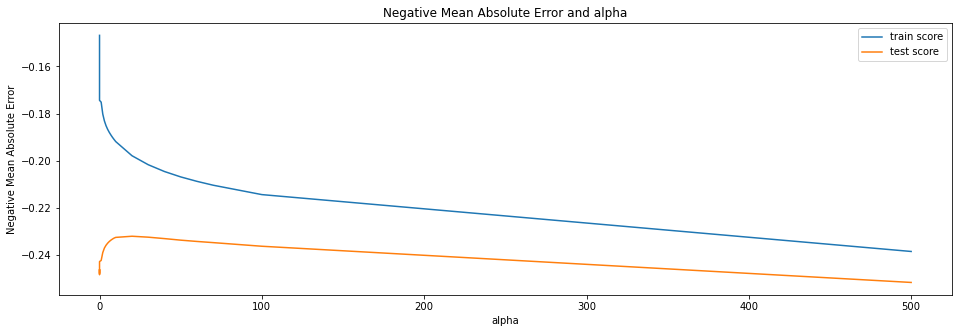

In [183]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

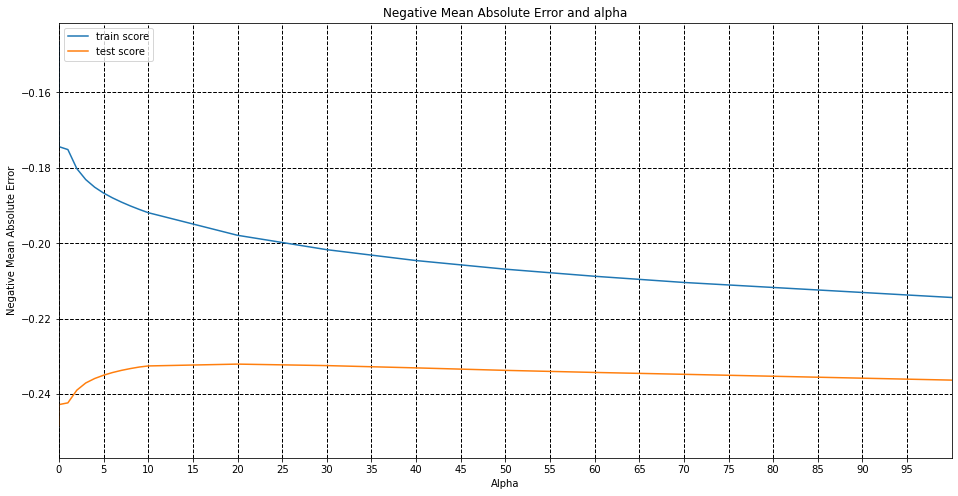

In [184]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [185]:
# Final ridge model with alpha as 20 but with log we get same alpha

ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [186]:
np.array(sorted(ridge.coef_, reverse=True))

array([ 2.19164285e-01,  1.81273556e-01,  1.71222731e-01,  1.42363166e-01,
        1.42188342e-01,  1.35419349e-01,  1.31288855e-01,  1.29644210e-01,
        1.24144285e-01,  1.17745747e-01,  1.13987357e-01,  1.11512063e-01,
        1.07841156e-01,  1.01874226e-01,  9.87730333e-02,  9.55917821e-02,
        9.26128543e-02,  9.26006663e-02,  9.06949972e-02,  8.86056696e-02,
        8.71809440e-02,  8.11301005e-02,  7.97178914e-02,  7.76231125e-02,
        7.40925738e-02,  7.40417244e-02,  7.38241976e-02,  7.37503277e-02,
        7.05456681e-02,  6.99621778e-02,  6.90384355e-02,  6.74138900e-02,
        6.65118058e-02,  6.59369193e-02,  6.32593076e-02,  6.22271617e-02,
        5.81827793e-02,  5.29383141e-02,  5.20133662e-02,  5.18235060e-02,
        5.12279678e-02,  5.04987912e-02,  4.61653757e-02,  4.60267380e-02,
        4.59130375e-02,  4.58540503e-02,  4.55727163e-02,  4.49333012e-02,
        4.40576627e-02,  4.37294646e-02,  4.28982547e-02,  4.25516316e-02,
        4.16877715e-02,  

In [187]:
# R-squared value for train and test
print("R-squared value")
y_train_pred_ridge = ridge.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

R-squared value
Train:  0.9106854222291274
Test:  0.8942911763399886


In [188]:
# Root mean_squared_error value for train and test
print("mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_ridge) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_ridge) ** 0.5)

mean_squared_error value
Train:  0.2988554462794222
Test:  0.3224657156134266


In [189]:
residual = y_train - y_train_pred_ridge

In [190]:
sum(residual)

1.7752466163756253e-13

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

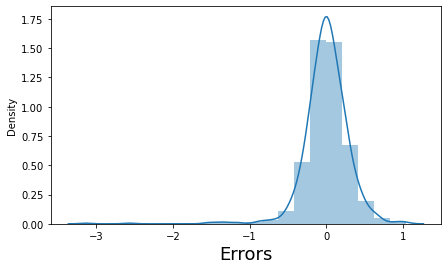

In [191]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

#### Error are independent of each other:

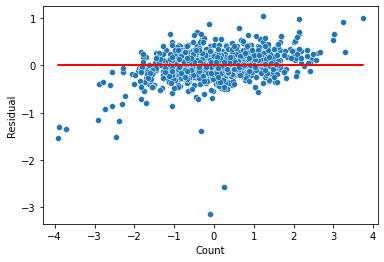

In [192]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- We can clearly see that this Ridge model is **not volilating** all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 

## Model C3: Lasso Regression

In [193]:
lasso = Lasso()

# list of alphas to tune
params = {'alpha': [0.00001,0.00008,0.00009, 0.0001, 0.0002, 0.0003,0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 
0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 100, 500, 1000]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 7 folds for each of 42 candidates, totalling 294 fits


GridSearchCV(cv=7, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
                                   0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
# checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0003}
-0.22907340263504075


In [195]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.131497      0.008561         0.002222        0.000796     0.00001   
1        0.076217      0.024144         0.001818        0.000177     0.00008   
2        0.076453      0.030849         0.001713        0.000043     0.00009   
3        0.071112      0.027563         0.001796        0.000099      0.0001   
4        0.051003      0.014775         0.001859        0.000369      0.0002   
5        0.053082      0.018532         0.001958        0.000463      0.0003   
6        0.051458      0.017171         0.001740        0.000077      0.0004   
7        0.077443      0.024286         0.002060        0.000702      0.0005   
8        0.085183      0.007664         0.001698        0.000026      0.0006   
9        0.073293      0.005885         0.001842        0.000107      0.0007   
10       0.063544      0.005561         0.001953        0.000360      0.0008   
11       0.050421      0.004833         0.001669        0.000026       0.001   
12       0.008808      0.004448         0.002001        0.000566        0.01   
13       0.004713      0.000131         0.001651        0.000013        0.05   
14       0.004429      0.000174         0.001789        0.000330         0.1   
15       0.004537      0.000560         0.001931        0.000638         0.2   
16       0.004052      0.000327         0.001764        0.000190         0.3   
17       0.004073      0.000482         0.002019        0.000857         0.4   
18       0.004115      0.001002         0.001653        0.000018         0.5   
19       0.003497      0.000085         0.001748        0.000155         0.6   
20       0.003463      0.000053         0.001650        0.000010         0.7   
21       0.003856      0.000937         0.001847        0.000269         0.8   
22       0.003415      0.000045         0.001837        0.000470         0.9   
23       0.003410      0.000043         0.002118        0.001167         1.0   
24       0.003585      0.000509         0.001958        0.000556         2.0   
25       0.003392      0.000040         0.001647        0.000012         3.0   
26       0.003382      0.000010         0.001640        0.000009         4.0   
27       0.003471      0.000214         0.001700        0.000138         5.0   
28       0.003387      0.000011         0.001650        0.000018         6.0   
29       0.003371      0.000009         0.001644        0.000017         7.0   
30       0.003407      0.000060         0.001691        0.000120         8.0   
31       0.004055      0.001427         0.002012        0.000885         9.0   
32       0.003389      0.000012         0.001643        0.000007        10.0   
33       0.003540      0.000355         0.002081        0.000874          20   
34       0.003389      0.000018         0.001640        0.000007          30   
35       0.003385      0.000010         0.001649        0.000019          40   
36       0.003411      0.000042         0.001648        0.000006          50   
37       0.003451      0.000076         0.001864        0.000475          60   
38       0.003507      0.000217         0.001648        0.000009          70   
39       0.003431      0.000105         0.001661        0.000029         100   
40       0.003457      0.000088         0.001787        0.000202         500   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}          -0.292147          -0.214326   
1    {'alpha': 8e-05}          -0.286989          -0.211178   
2    {'alpha': 9e-05}          -0.286326          -0.210724   
3   {'alpha': 0.0001}          -0.285704          -0.210533   
4   {'alpha': 0.0002}          -0.279151          -0.211409   
5   {'alpha': 0.0003}          -0.273321          -0.218392   
6   {'alpha': 0.0004}          -0.270878          -0.224811   
7   {'alpha': 0.0005}          -0.269654          -0.229699   
8   {'alpha': 0.0006}          -0.269566          -0.230316   
9   {'alpha':

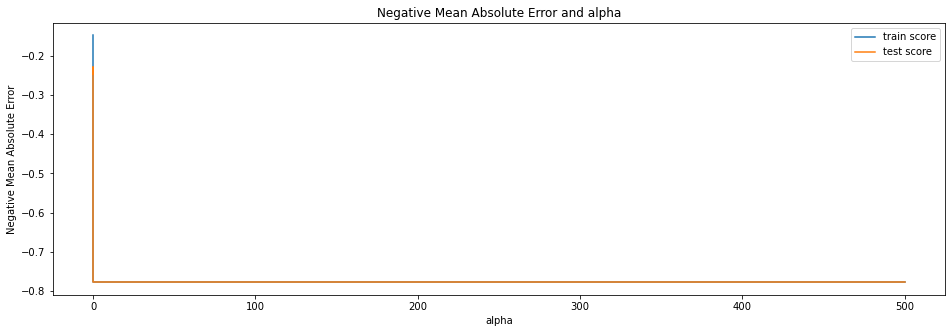

In [196]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

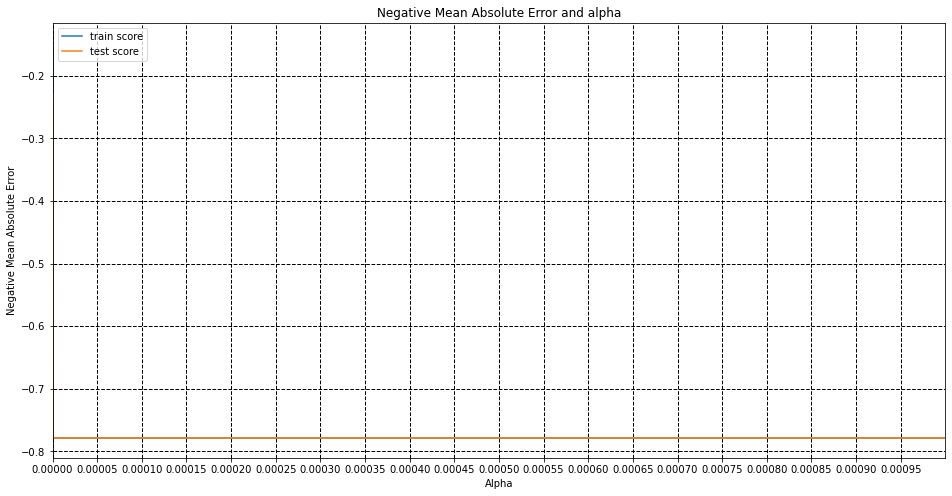

In [197]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0.0, 0.001)
plt.xticks(np.arange(0.0, 0.001, 0.00005))
plt.grid(color='black', linestyle='--', linewidth=1)
plt.show()

In [198]:
#final lasso model
alpha = 0.0003
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0003)

In [199]:
# R-squared value for train and test for Lasso model
print("R-squared value")
y_train_pred_lasso = lasso.predict(X_train)
print("Train: ", r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print("Test: ", r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

R-squared value
Train:  0.944913592041693
Test:  0.8573581834436159


In [200]:
# Root mean_squared_error value for train and test for Lasso model
print("Root mean_squared_error value")
print("Train: ", mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso) ** 0.5)
print("Test: ", mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso) ** 0.5)

Root mean_squared_error value
Train:  0.23470493807823267
Test:  0.37458584147346446


In [201]:
residual = y_train - y_train_pred_lasso

In [202]:
sum(residual)

7.558398351648066e-13

#### Normality of Errors:

<Figure size 432x288 with 0 Axes>

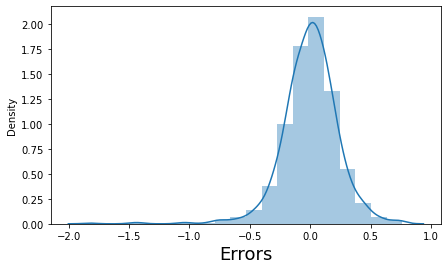

In [203]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.figure(figsize = (7,4))
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18) # X-label
plt.show()

#### Error are independent of each other:

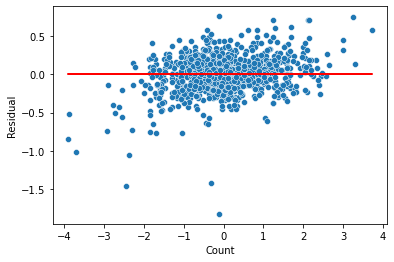

In [204]:
sns.scatterplot(y_train,residual) # ploting y_train vs residual
plt.plot(y_train,(y_train - y_train), '-r') # ploting a stright line on 0th of y-axis
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- Here we can clearly see that this Lasso model is **not volilating** all the Assumption of Linear Regression
- Error terms should be independent 
- Error terms should be normally distributed
- Sum of Error or Residual is almost 0. 
- Error terms should have equal variance 

## Ridge VS Lasso after applying LOG
### For Ridge: 
**Alpha: 20**

**R-squared value for Ridge**
- Train:  0.911
- Test:  0.894

**mean_squared_error value**
- Train:  0.299
- Test:  0.322

******
### For Lasso:
**Alpha: 0.0003**

**R-squared value**
- Train:  0.945
- Test:   0.857

**mean_squared_error value**
- Train:  0.235
- Test:   0.375


In [205]:
model_coef = pd.DataFrame(index=range(len(X_train.columns)))
model_coef["col"] = X_train.columns
model_coef["ridge_cof"] = ridge.coef_
model_coef["Abs_ridge_cof"] = list(np.abs(cof) for cof in ridge.coef_)
model_coef["lasso_cof"] = lasso.coef_
model_coef["Abs_lasso_cof"] = list(np.abs(cof) for cof in lasso.coef_)

In [206]:
model_coef.sort_values(by="Abs_lasso_cof", ascending=False)

col  ridge_cof  Abs_ridge_cof  lasso_cof  Abs_lasso_cof
51       Condition2_PosN  -0.128342       0.128342  -3.164559       3.164559
77      RoofMatl_WdShngl   0.050499       0.050499   2.666807       2.666807
71      RoofMatl_CompShg   0.073750       0.073750   2.531388       2.531388
75      RoofMatl_Tar&Grv   0.009443       0.009443   2.321044       2.321044
76      RoofMatl_WdShake   0.006657       0.006657   2.293756       2.293756
..                   ...        ...            ...        ...            ...
100    Exterior2nd_Other   0.000029       0.000029  -0.000000       0.000000
102    Exterior2nd_Stone   0.018437       0.018437   0.000000       0.000000
104  Exterior2nd_VinylSd   0.010321       0.010321   0.000000       0.000000
186        GarageCond_TA   0.005031       0.005031   0.000000       0.000000
120     Foundation_Stone   0.010608       0.010608   0.000000       0.000000

[240 rows x 5 columns]

### Getting Ridge coefs:

In [207]:
ridge_coef = model_coef[["col", "ridge_cof", "Abs_ridge_cof"]].sort_values(by="Abs_ridge_cof", ascending=False)
ridge_coef.head(15)

col  ridge_cof  Abs_ridge_cof
206           OverallQual   0.219164       0.219164
31   Neighborhood_NridgHt   0.181274       0.181274
21   Neighborhood_Crawfor   0.171223       0.171223
219             GrLivArea   0.142363       0.142363
200  SaleCondition_Normal   0.142188       0.142188
37   Neighborhood_StoneBr   0.135419       0.135419
80    Exterior1st_BrkFace   0.131289       0.131289
229            GarageCars   0.129644       0.129644
24    Neighborhood_IDOTRR  -0.129444       0.129444
22   Neighborhood_Edwards  -0.128828       0.128828
51        Condition2_PosN  -0.128342       0.128342
41        Condition1_Norm   0.124144       0.124144
49        Condition2_Norm   0.117746       0.117746
207           OverallCond   0.113987       0.113987
167        Functional_Typ   0.111512       0.111512

### Top Ten Ridge coefficient are:

In [208]:
ridge_coef[["col", "ridge_cof"]].reset_index(drop=True).head(10)

col  ridge_cof
0           OverallQual   0.219164
1  Neighborhood_NridgHt   0.181274
2  Neighborhood_Crawfor   0.171223
3             GrLivArea   0.142363
4  SaleCondition_Normal   0.142188
5  Neighborhood_StoneBr   0.135419
6   Exterior1st_BrkFace   0.131289
7            GarageCars   0.129644
8   Neighborhood_IDOTRR  -0.129444
9  Neighborhood_Edwards  -0.128828

### Getting Lasso coefs:

In [209]:
lasso_coef = model_coef[["col", "lasso_cof", "Abs_lasso_cof"]].sort_values(by="Abs_lasso_cof", ascending=False)
lasso_coef.head(15)

col  lasso_cof  Abs_lasso_cof
51        Condition2_PosN  -3.164559       3.164559
77       RoofMatl_WdShngl   2.666807       2.666807
71       RoofMatl_CompShg   2.531388       2.531388
75       RoofMatl_Tar&Grv   2.321044       2.321044
76       RoofMatl_WdShake   2.293756       2.293756
73         RoofMatl_Metal   2.236751       2.236751
74          RoofMatl_Roll   2.235742       2.235742
1             MSZoning_RH   1.073245       1.073245
0             MSZoning_FV   1.038871       1.038871
2             MSZoning_RL   1.007835       1.007835
3             MSZoning_RM   0.865588       0.865588
162       Functional_Maj2  -0.454041       0.454041
148          Heating_Grav  -0.429723       0.429723
195          SaleType_Oth   0.362383       0.362383
21   Neighborhood_Crawfor   0.323555       0.323555

### Top Ten Lasso coefficient are:

In [210]:
lasso_coef[["col", "lasso_cof"]].reset_index(drop=True).head(10)

col  lasso_cof
0   Condition2_PosN  -3.164559
1  RoofMatl_WdShngl   2.666807
2  RoofMatl_CompShg   2.531388
3  RoofMatl_Tar&Grv   2.321044
4  RoofMatl_WdShake   2.293756
5    RoofMatl_Metal   2.236751
6     RoofMatl_Roll   2.235742
7       MSZoning_RH   1.073245
8       MSZoning_FV   1.038871
9       MSZoning_RL   1.007835

## Model Conclusion


We can clearly say observed that Model C preformed the best and we will go with model C


## 15 Significant Attributes Required in Predicting the Price of a House

1. BsmtFinType2
2. LotArea
3. ExterQual
4. Exterior1st_BrkComm
5. Foundation_Wood
6. Exterior2nd_Wd Shng
7. LandSlope 
8. LotShape
9. Foundation_Slab
10. HeatingQC
11. OverallQual
12. BsmtCond
13. Exterior1st_AsphShn
14. PoolArea
15. Exterior1st_CBlock